# GDS Project Data collection and proccesing

### Environment setup
+ Dokumentieren 

## Analyse
### Korrelation zwischen
+ Saisonal
+ Tageszeit (Peaks zum beispiel)
+ Wochentag
+ (Lichtverhältnisse)
+ Stadtteil
+ Beteiligte Fahrzeugtypen
### Cluster Analyse
+ K nearest or anything
### Further ideas
+ Monte Carlo test

In [1]:
# csv file laden
import geopandas as gpd
import pandas as pd

/var/folders/11/nm6kpssd7xzgy74kn2x39xx80000gn/T/ipykernel_15643/2358390490.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
df = gpd.read_file("Data/Shapefile/Unfallorte2021_LinRef.shp")

In [3]:
df.head()
df_bike = df[df["IstRad"] == "1"]

In [4]:
len(df_bike), len(df), len(df_bike)/len(df)

(71698, 233208, 0.30744228328359235)

In [5]:
len(df_bike[df_bike["ULAND"] == "02"]), len(df[df['ULAND'] == '02']), len(df_bike[df_bike["ULAND"] == "02"])/len(df[df['ULAND'] == '02'])

(2455, 6246, 0.3930515529939161)

In [6]:
df_bike.head()

OBJECTID            UIDENTSTLA ULAND UREGBEZ UKREIS UGEMEINDE UJAHR UMONAT  \
2         3  01210610181013902021    01       0     61       007  2021     06   
3         4  01210524161013132021    01       0     53       041  2021     05   
4         5  01210529152013382022    01       0     55       032  2021     05   
6         7  01210512171013412021    01       0     56       037  2021     05   
7         8  01210325105132862021    01       0     56       043  2021     03   

  USTUNDE UWOCHENTAG  ... IstFuss IstKrad IstGkfz IstSonstig        LINREFX  \
2      13          5  ...       0       0       0          1  527231.388501   
3      11          2  ...       0       0       0          0  614902.973625   
4      15          7  ...       0       0       0          0  617331.180263   
6      14          4  ...       0       0       0          0  540082.958405   
7      06          5  ...       0       0       0          0  555471.603000   

        LINREFY  XGCSWGS84  YGCSWGS84 USTRZUSTAN  \
2  5.972658e+06   9.414457  53.901645          0   
3  5.963897e+06  10.745101  53.810913          0   
4  5.996138e+06  10.794357  54.100018          0   
6  5.947625e+06   9.606790  53.675817          0   
7  5.943956e+06   9.839070  53.641432          0   

                         geometry  
2  POINT (527231.389 5972658.256)  
3  POINT (614902.974 5963896.514)  
4  POINT (617331.180 5996138.283)  
6  POINT (540082.958 5947624.890)  
7  POINT (555471.603 5943955.564)  

[5 rows x 26 columns]

In [7]:
df_bike.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot: >

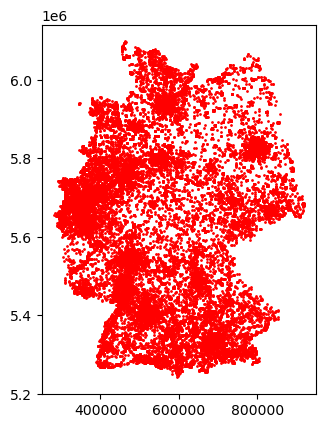

In [8]:
# plot points in df_bike
df_bike.plot(marker="o", color="red", markersize=1)

In [9]:
df_bike_hh = df_bike[df_bike["ULAND"] == "02"]

In [10]:
df_bike_hh.columns

Index(['OBJECTID', 'UIDENTSTLA', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad',
       'IstGkfz', 'IstSonstig', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'USTRZUSTAN', 'geometry'],
      dtype='object')

In [11]:
# get districts of hamburg from shapefile
df_districts = gpd.read_file("Data/hh_districts/Stadtteile_Hamburg.shp")

df_districts = df_districts[df_districts['stadtteil_'] != 'Neuwerk']

In [12]:
df_bike_hh.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
df_districts = df_districts.to_crs("EPSG:25832")

In [14]:
# import ctx
import contextily as ctx
import matplotlib.pyplot as plt

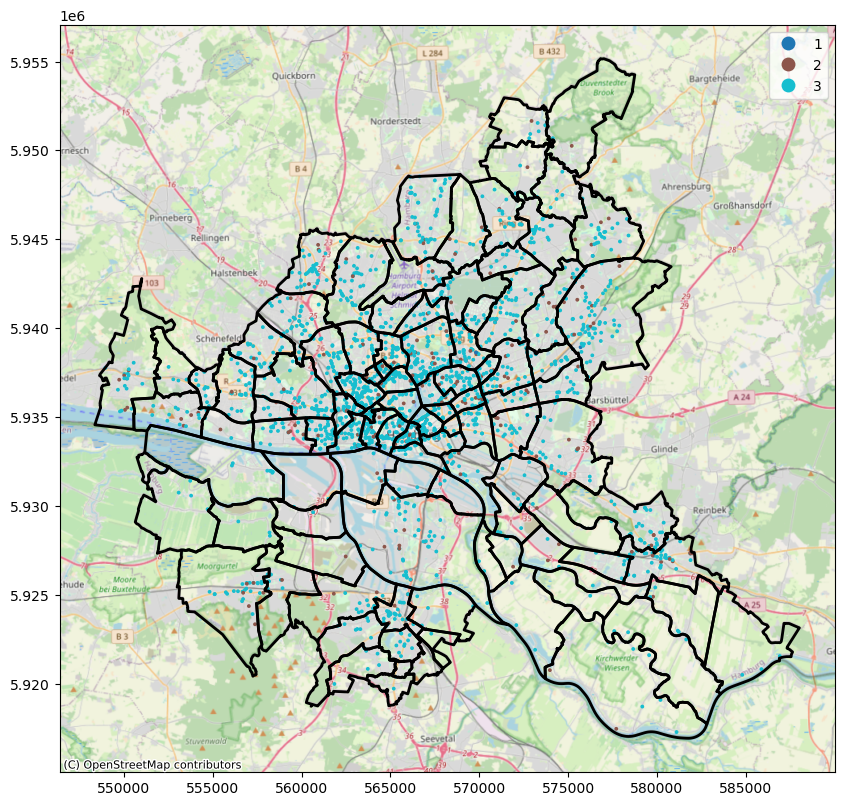

In [15]:
# color legend by 'UKATEGORIE'
fig, ax = plt.subplots(figsize=(10, 10))
df_bike_hh.plot(ax=ax, column="UKATEGORIE", legend=True, markersize=3)
# add districts
df_districts.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
# add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=df_bike_hh.crs.to_string())


In [16]:
df_bike_hh.columns

Index(['OBJECTID', 'UIDENTSTLA', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad',
       'IstGkfz', 'IstSonstig', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'USTRZUSTAN', 'geometry'],
      dtype='object')

In [17]:
# correlation matrix of bike accidents in hamburg
# columns to use
cols = ["UKATEGORIE", "UART", "UMONAT", "USTUNDE", "UWOCHENTAG", "UTYP1", "ULICHTVERH", "IstPKW", "IstKrad", "IstGkfz", "IstSonstig"]

# filter by cols
df_bike_hh_corr = df_bike_hh[cols]

# convert to int
df_bike_hh_corr = df_bike_hh_corr.astype(int)

# calculate correlation matrix for categorical variables
corr = df_bike_hh_corr.corr(method="spearman")


In [18]:
corr

UKATEGORIE      UART    UMONAT   USTUNDE  UWOCHENTAG     UTYP1  \
UKATEGORIE    1.000000  0.012461  0.011443 -0.007444   -0.008974 -0.027908   
UART          0.012461  1.000000 -0.039441 -0.007978    0.050172 -0.426924   
UMONAT        0.011443 -0.039441  1.000000 -0.060132   -0.059842 -0.029006   
USTUNDE      -0.007444 -0.007978 -0.060132  1.000000    0.003039  0.020680   
UWOCHENTAG   -0.008974  0.050172 -0.059842  0.003039    1.000000 -0.033804   
UTYP1        -0.027908 -0.426924 -0.029006  0.020680   -0.033804  1.000000   
ULICHTVERH    0.004282 -0.079056  0.165269  0.181074   -0.007024  0.012458   
IstPKW        0.049074  0.330156  0.008190 -0.000519   -0.011759 -0.443717   
IstKrad       0.029275  0.016108 -0.012014 -0.008425    0.012539 -0.018372   
IstGkfz      -0.053836 -0.014264  0.002998 -0.011553    0.025208 -0.026596   
IstSonstig    0.015454  0.006139  0.015651 -0.017097    0.020285 -0.044571   

            ULICHTVERH    IstPKW   IstKrad   IstGkfz  IstSonstig  
UKATEGORIE    0.004282  0.049074  0.029275 -0.053836    0.015454  
UART         -0.079056  0.330156  0.016108 -0.014264    0.006139  
UMONAT        0.165269  0.008190 -0.012014  0.002998    0.015651  
USTUNDE       0.181074 -0.000519 -0.008425 -0.011553   -0.017097  
UWOCHENTAG   -0.007024 -0.011759  0.012539  0.025208    0.020285  
UTYP1         0.012458 -0.443717 -0.018372 -0.026596   -0.044571  
ULICHTVERH    1.000000 -0.042192  0.011180 -0.017333   -0.007893  
IstPKW       -0.042192  1.000000 -0.085905 -0.116564   -0.339482  
IstKrad       0.011180 -0.085905  1.000000 -0.010080   -0.031191  
IstGkfz      -0.017333 -0.116564 -0.010080  1.000000   -0.038280  
IstSonstig   -0.007893 -0.339482 -0.031191 -0.038280    1.000000

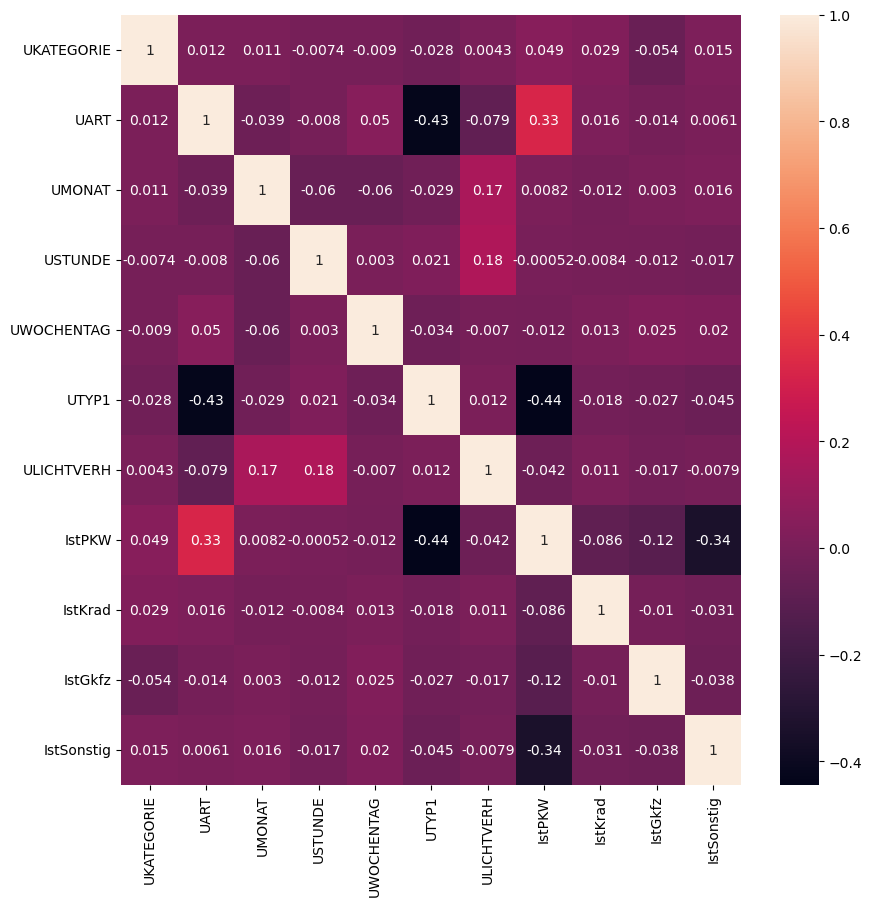

In [19]:
# plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# plot correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, ax=ax);


# Descriptive analysis

In [20]:
df_bike_hh['IstNurRad'] = df_bike_hh[['IstPKW', 'IstFuss', 'IstKrad', 'IstGkfz', 'IstSonstig']].apply(lambda x: 1 if pd.to_numeric(x).sum() == 0 else 0, axis = 1)

/Users/tobias/opt/miniconda3/envs/geospatial/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [21]:
df_bike_hh[['IstPKW', 'IstFuss', 'IstKrad', 'IstGkfz', 'IstSonstig', 'IstNurRad']].apply(pd.to_numeric).sum()

IstPKW        1285
IstFuss        162
IstKrad         20
IstGkfz         30
IstSonstig     260
IstNurRad      716
dtype: int64

In [22]:
df_bike_hh[['IstPKW', 'IstFuss', 'IstKrad', 'IstGkfz', 'IstSonstig', 'IstNurRad']].apply(pd.to_numeric).sum()/len(df_bike_hh)

IstPKW        0.523422
IstFuss       0.065988
IstKrad       0.008147
IstGkfz       0.012220
IstSonstig    0.105906
IstNurRad     0.291650
dtype: float64

In [23]:
df_bike_hh[['ULICHTVERH', 'IstRad']].groupby(['ULICHTVERH']).count()

IstRad
ULICHTVERH        
0             1954
1              140
2              361

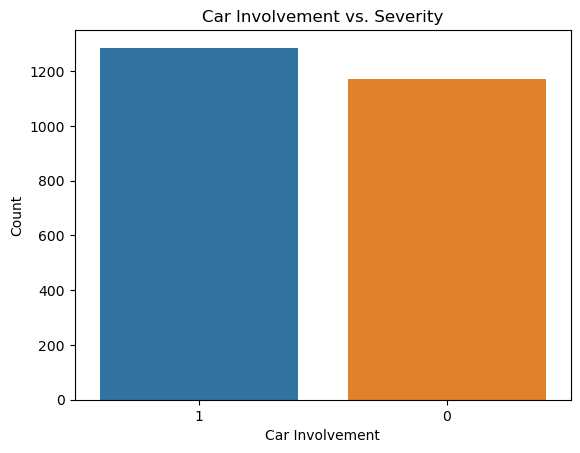

In [24]:
car_involvement = df_bike_hh['IstPKW']
severity = df_bike_hh['UKATEGORIE']
# sort severity
severity = severity.sort_values()

# Create a bar chart
sns.countplot(x=car_involvement) #, hue=severity)
#sns.countplot(x=severity)
plt.xlabel('Car Involvement')
plt.ylabel('Count')
plt.title('Car Involvement vs. Severity')
plt.show()

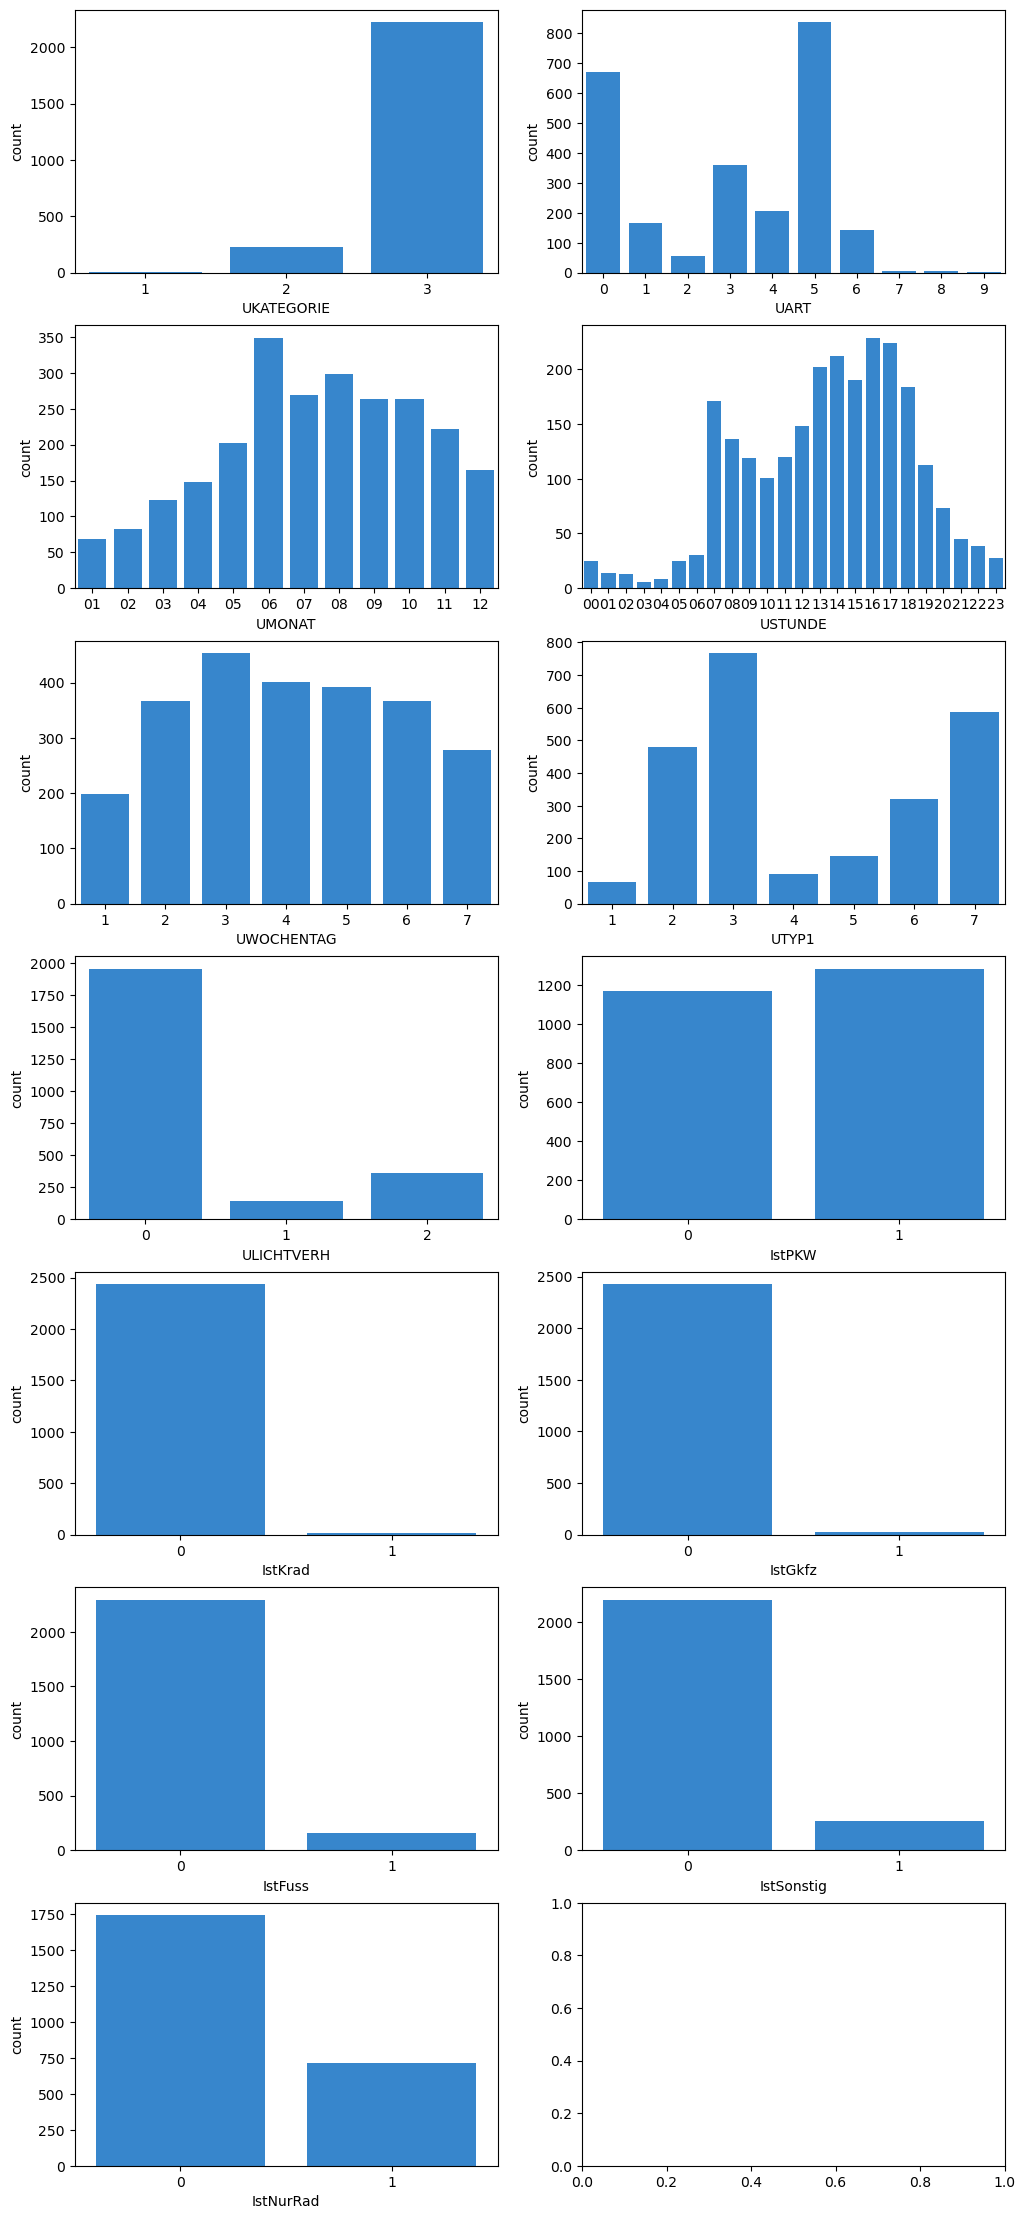

In [49]:
print_cols = ["UKATEGORIE", "UART", "UMONAT", "USTUNDE", "UWOCHENTAG", "UTYP1", "ULICHTVERH", "IstPKW", "IstKrad", "IstGkfz", "IstFuss", "IstSonstig", "IstNurRad"]

fig, axes = plt.subplots(7,2, figsize=(12,4*7))

ax = axes.ravel()

for i in range(len(print_cols)):

    x = df_bike_hh[print_cols[i]].sort_values()

    sns.countplot(
        x = x
        ,ax = ax[i]
        ,color = '#1E88E5'
    )

plt.show()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(18,4))

sns.countplot(
    ax = ax
    ,x = df_bike_hh['UMONAT'].sort_values()
    ,color = '#1E88E5'
);

ax.set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'
    , 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])
ax.set_xlabel('Month')
ax.set_ylabel('Count')

plt.show()

/var/folders/11/nm6kpssd7xzgy74kn2x39xx80000gn/T/ipykernel_61506/540837204.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon'])


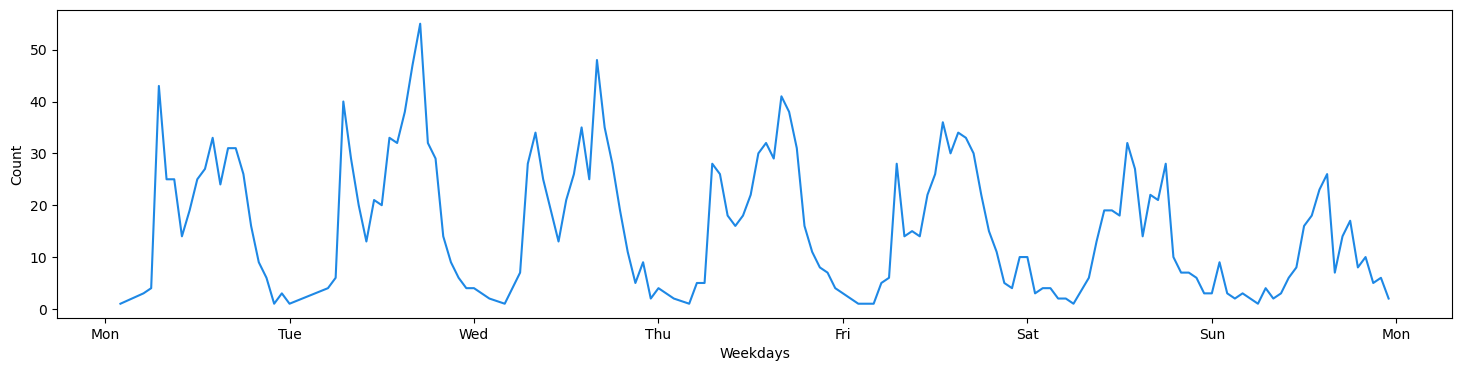

In [52]:
# Time series

df_ts = df_bike_hh[['UWOCHENTAG', 'USTUNDE', 'IstRad']].groupby(['UWOCHENTAG', 'USTUNDE']).count().reset_index()

# Reset 1 to Monday, 7 to Sunday
df_ts['UWOCHENTAG'] = df_ts['UWOCHENTAG'].apply(lambda x: '7' if x == '1' else str(int(x) - 1))
# Convert to datetime
df_ts['datetime'] = df_ts.apply(lambda x: "2021-01-0"+x.UWOCHENTAG+" "+x.USTUNDE+":00:00",axis = 1)

df_ts['datetime'] = df_ts['datetime'].apply(pd.to_datetime)

fig, ax = plt.subplots(1,1, figsize=(18,4))

sns.lineplot(
    ax = ax
    ,x = 'datetime'
    ,y = 'IstRad'
    , data = df_ts
    ,color = '#1E88E5'
);

ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon'])
ax.set_xlabel('Weekdays')
ax.set_ylabel('Count')

plt.show()

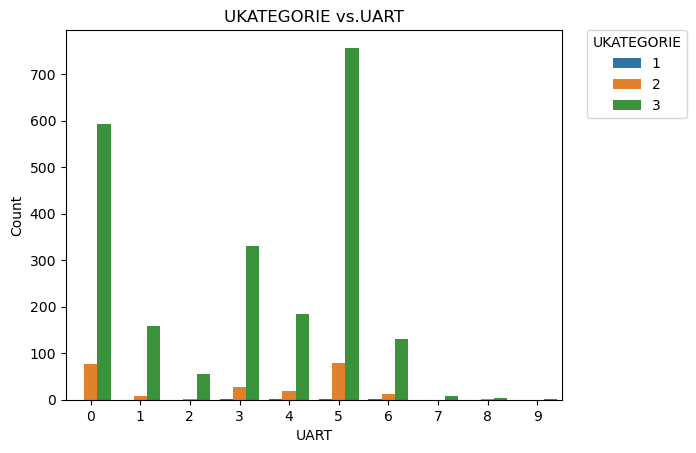

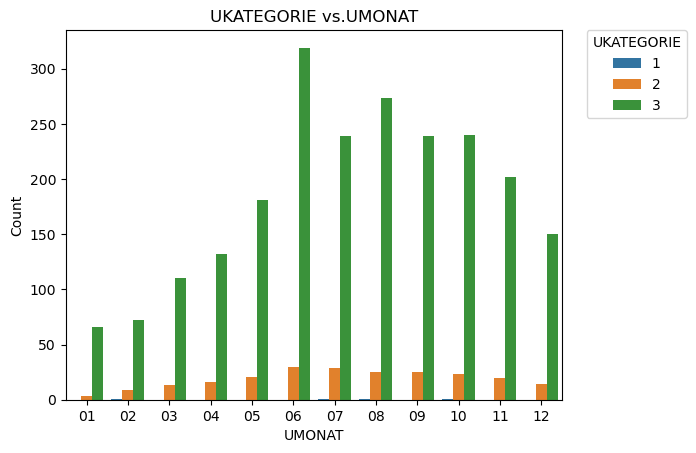

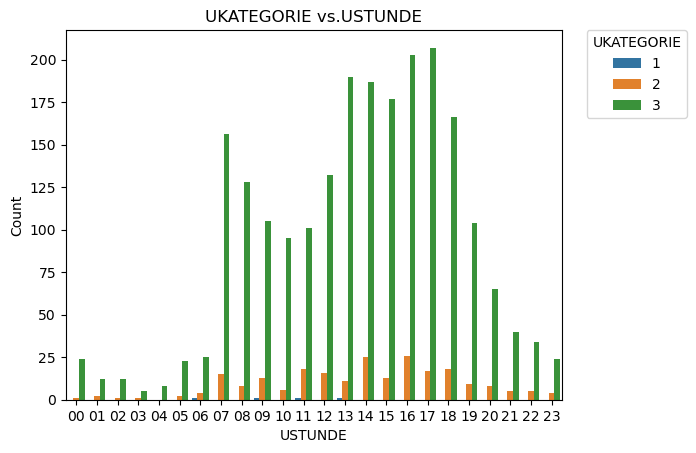

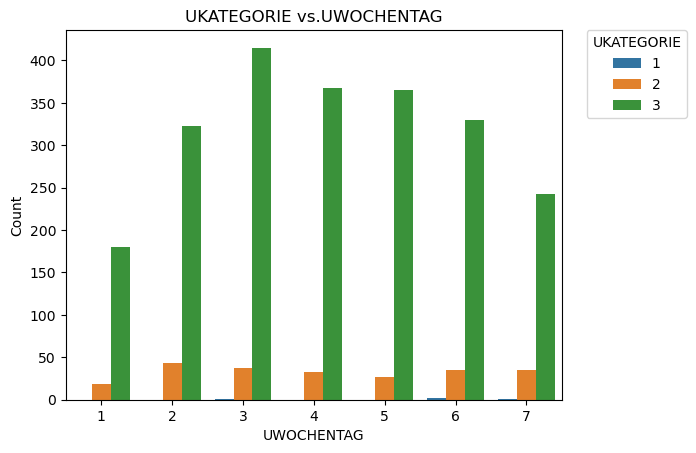

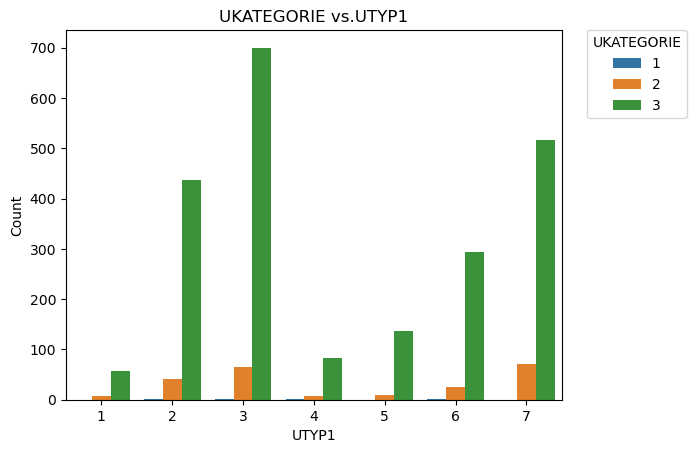

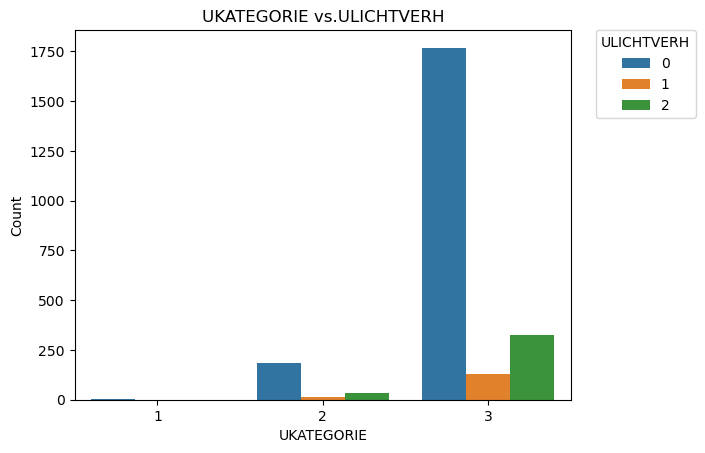

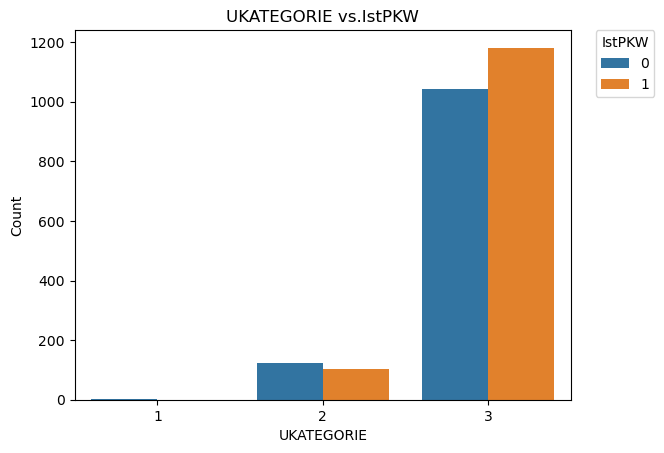

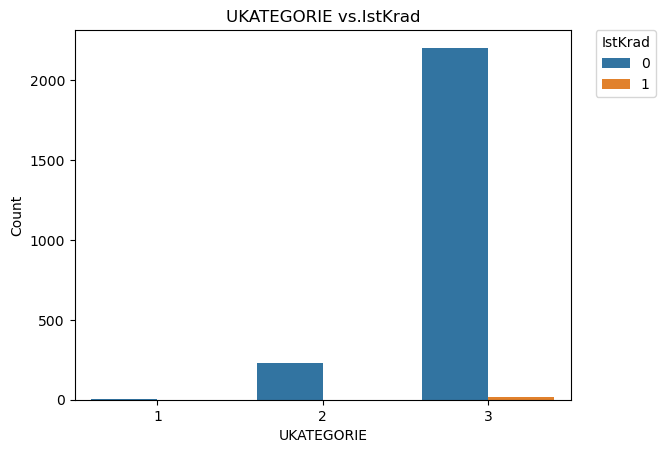

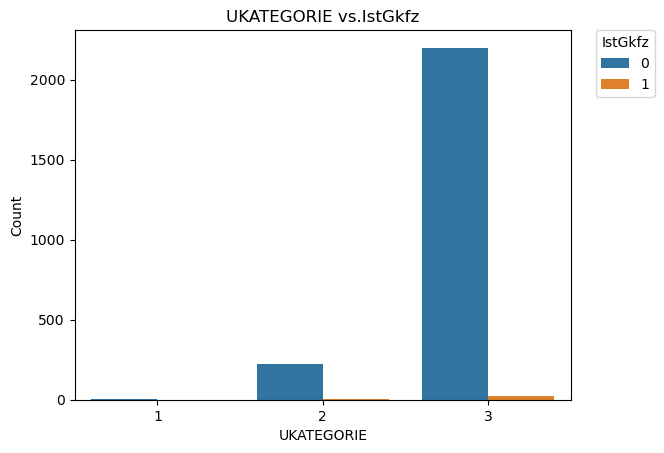

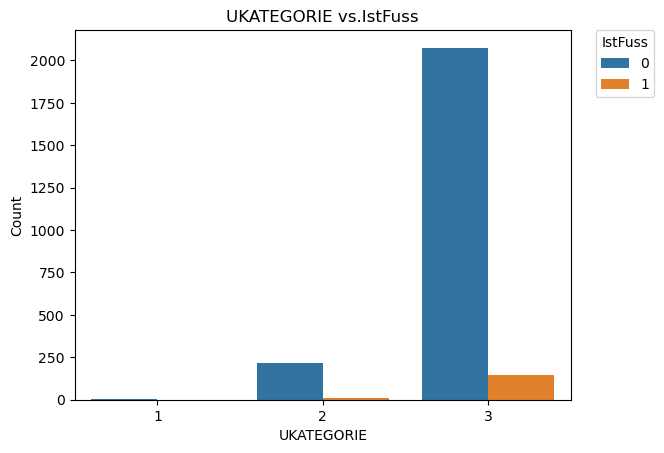

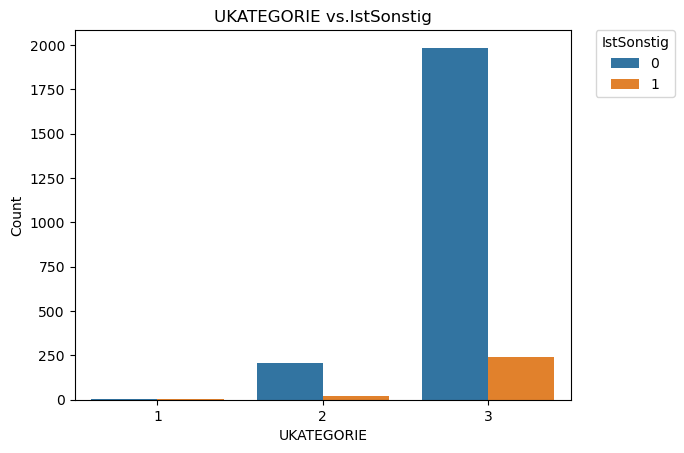

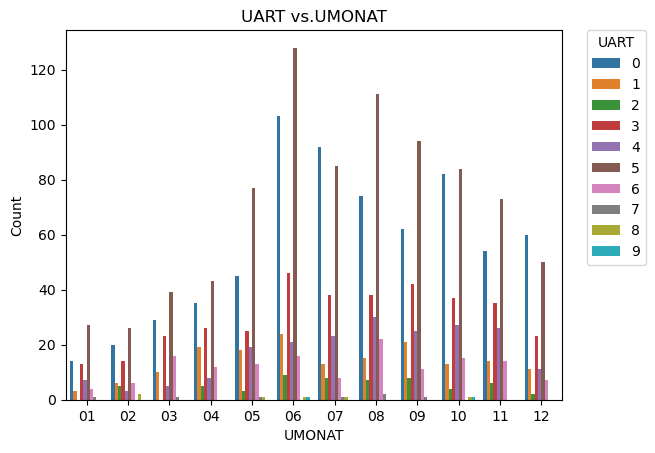

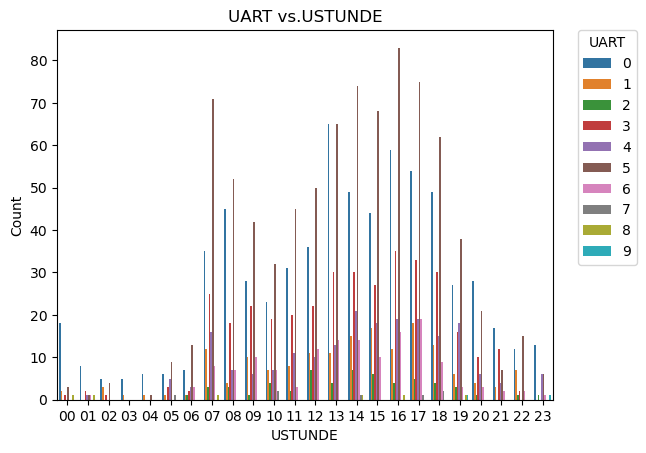

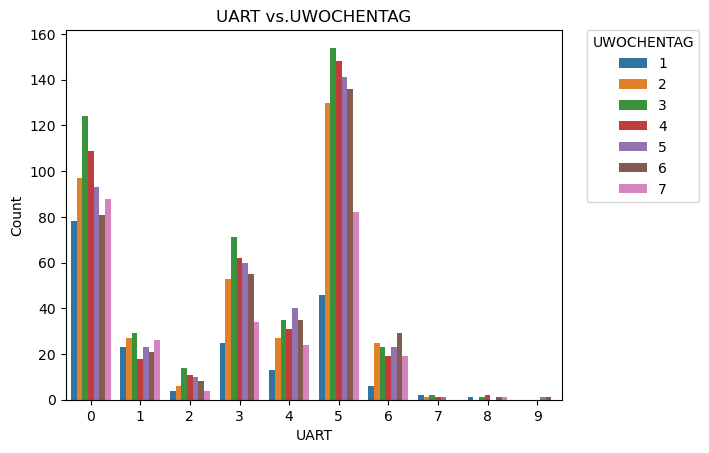

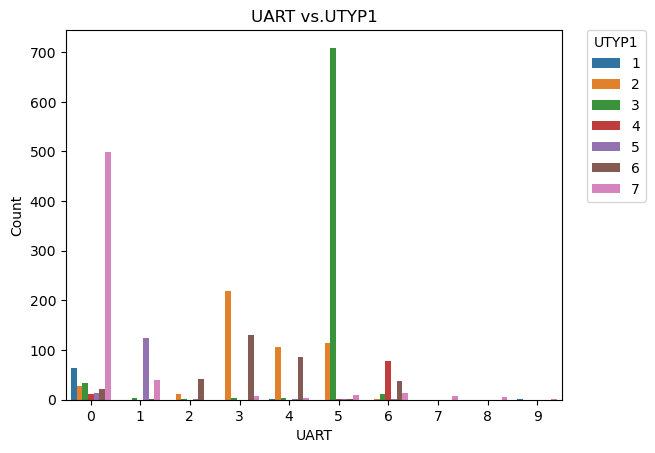

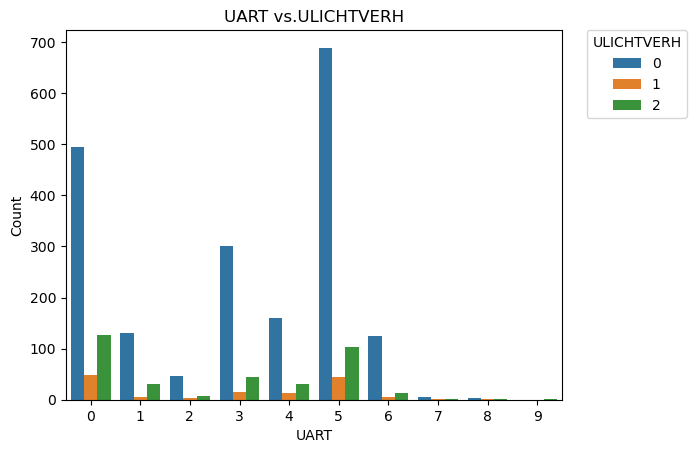

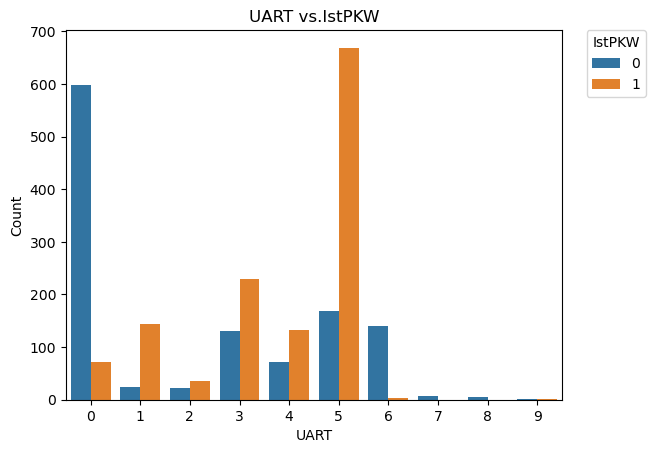

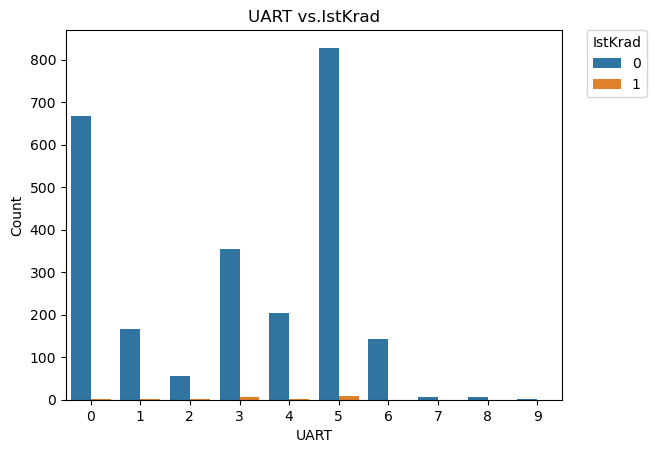

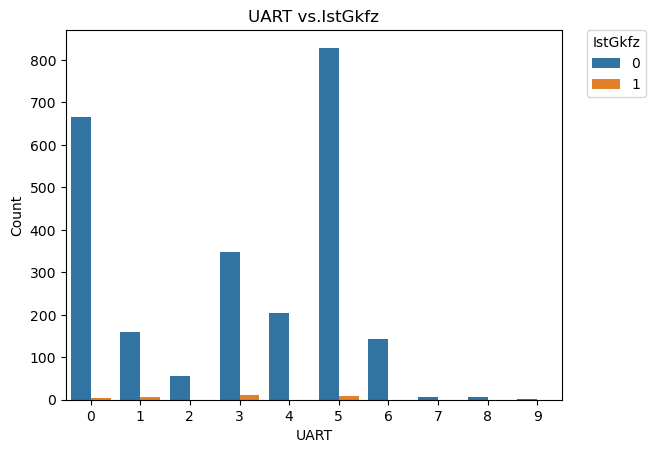

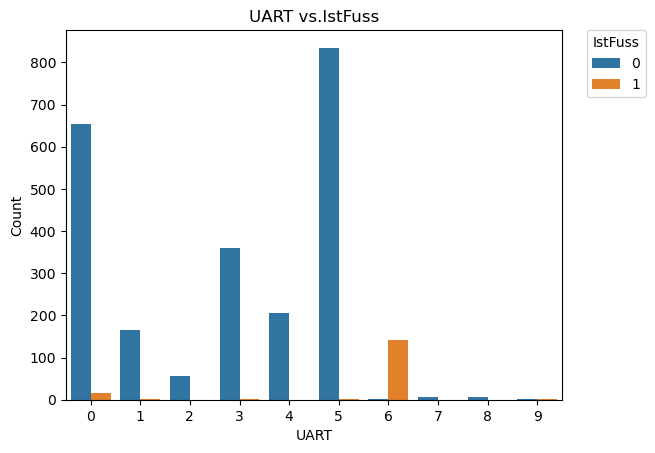

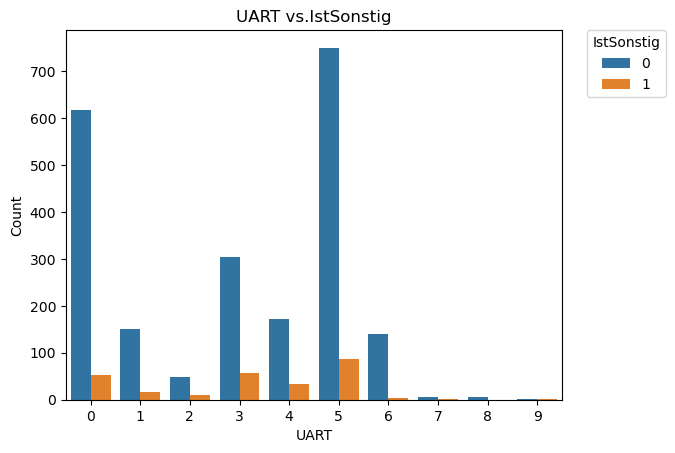

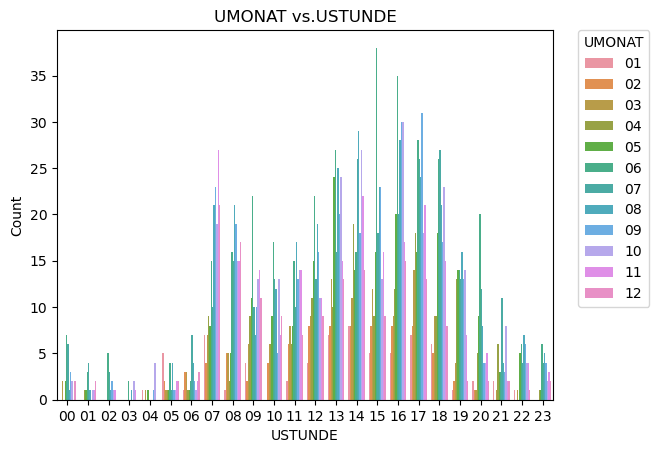

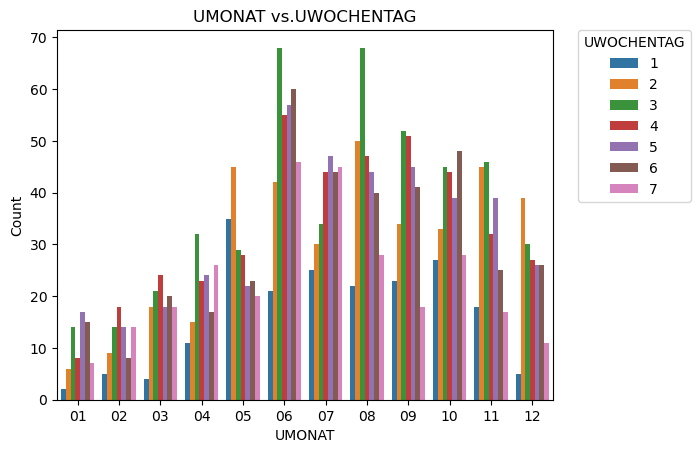

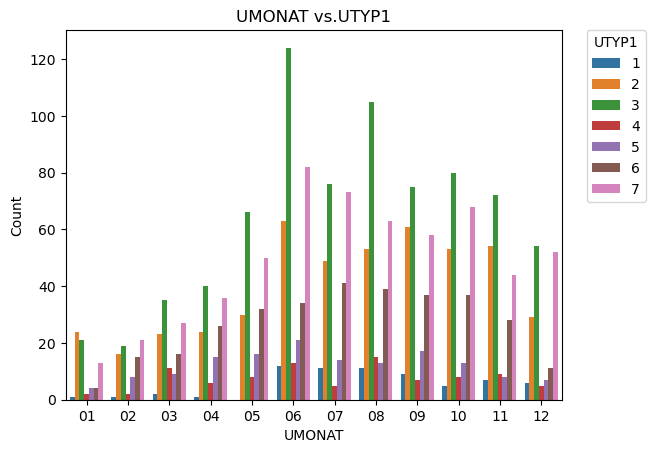

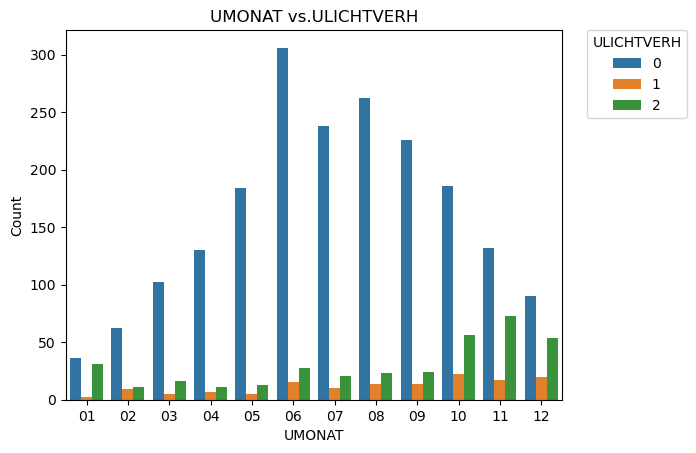

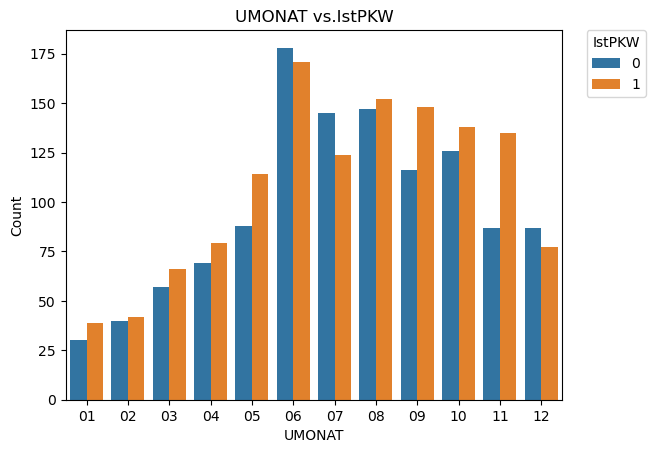

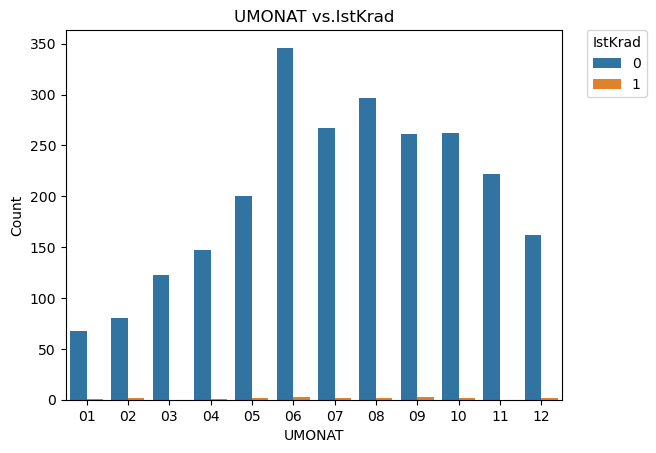

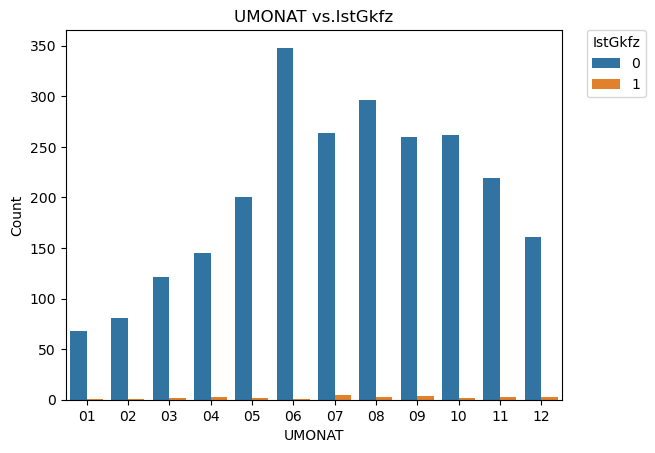

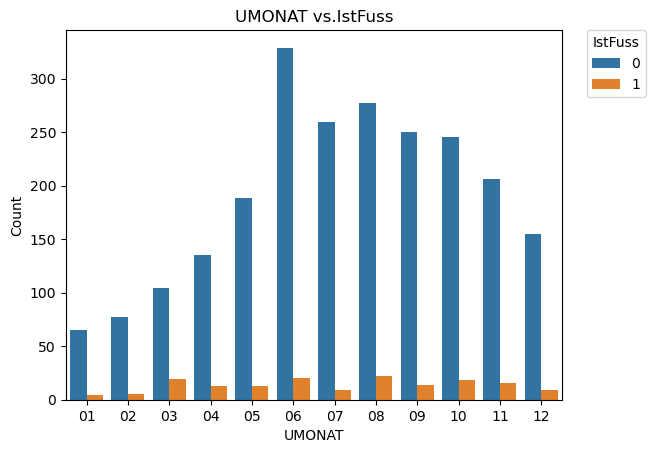

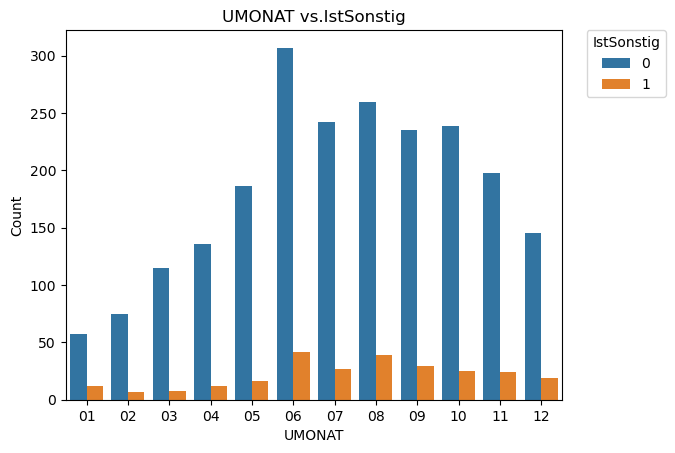

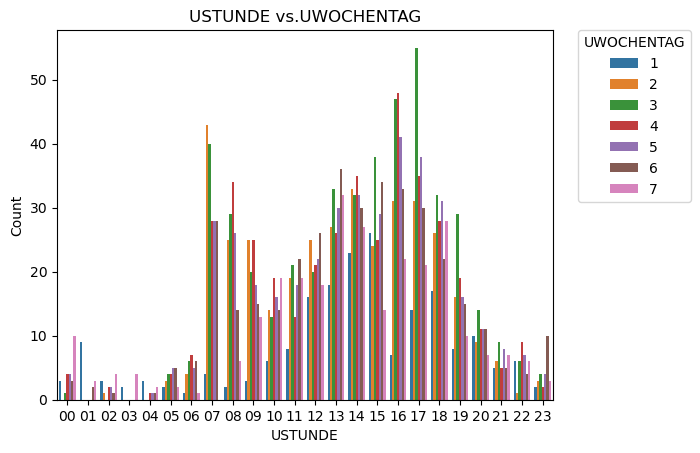

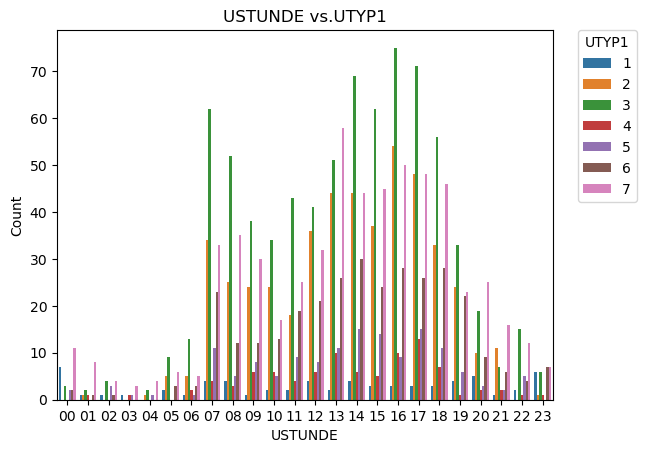

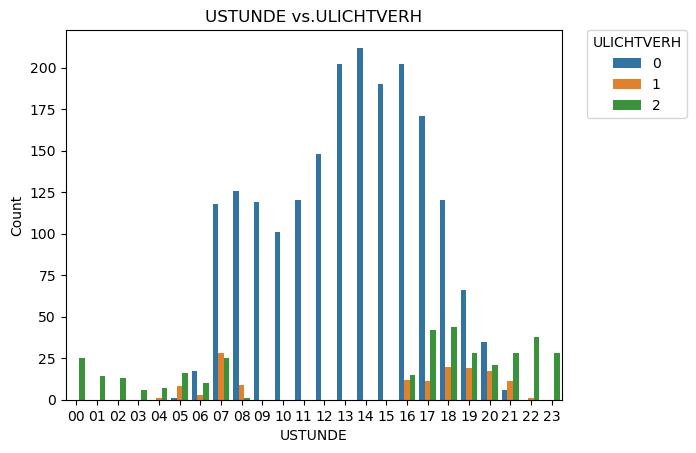

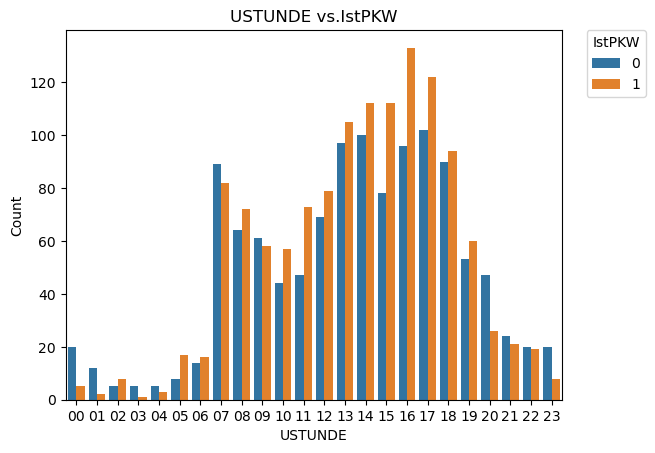

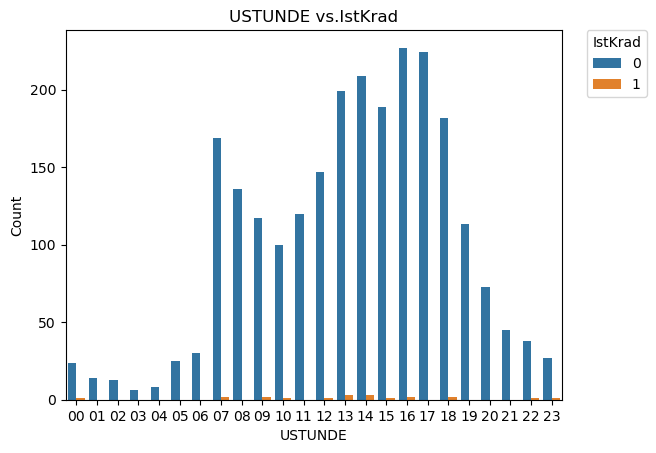

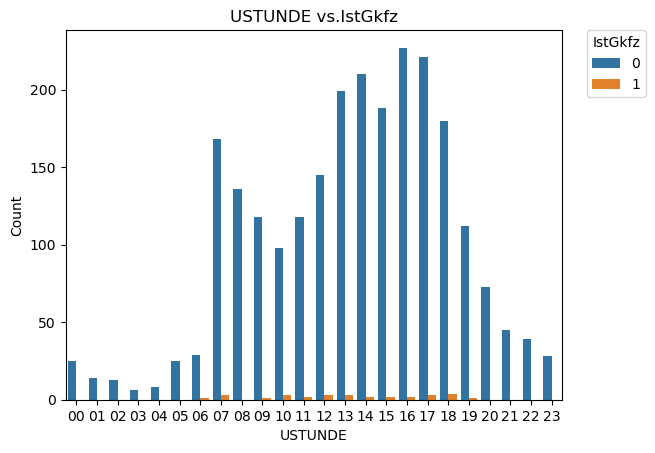

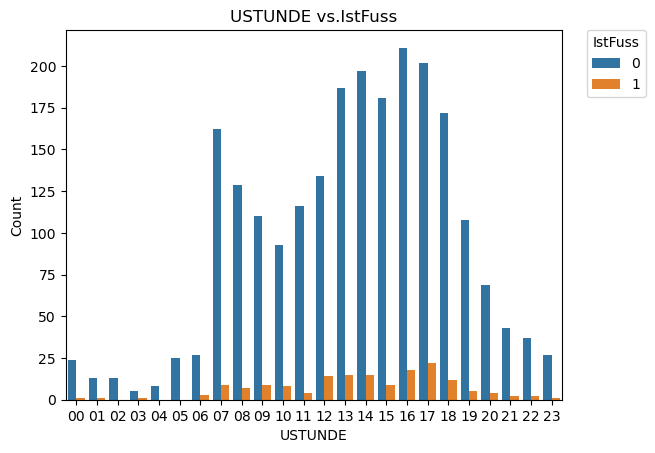

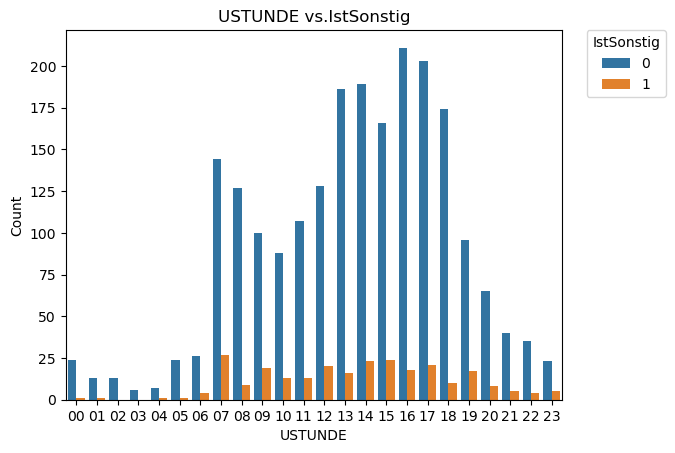

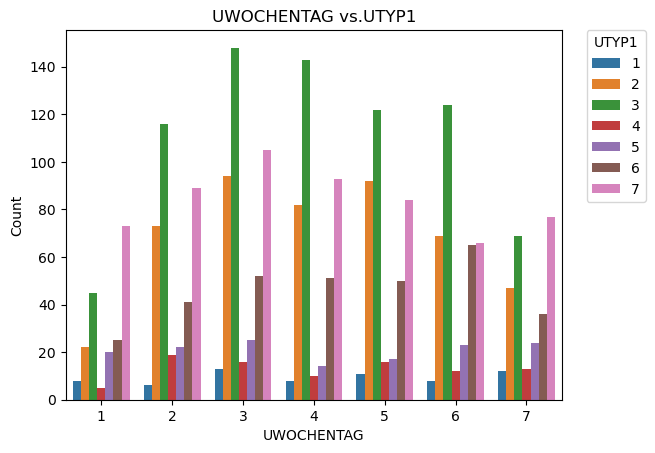

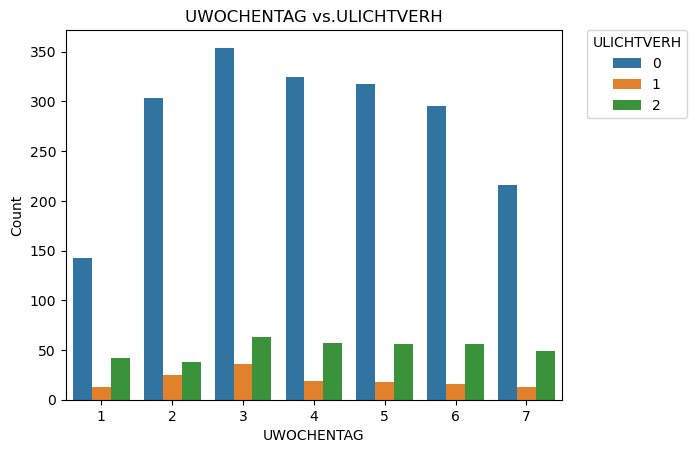

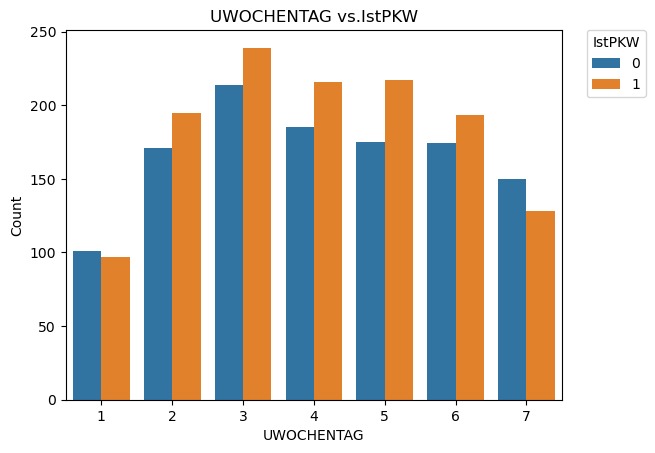

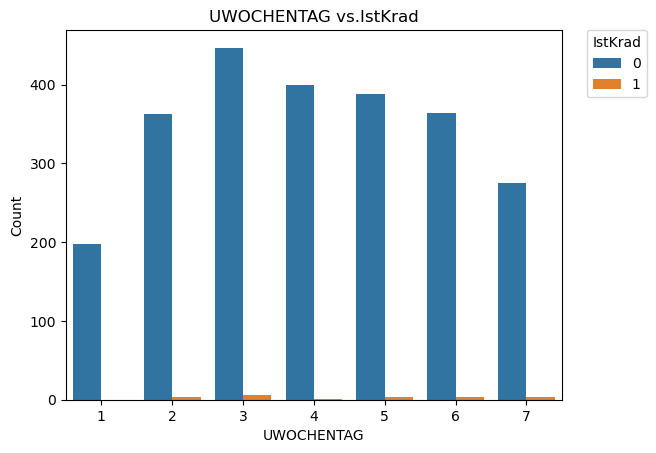

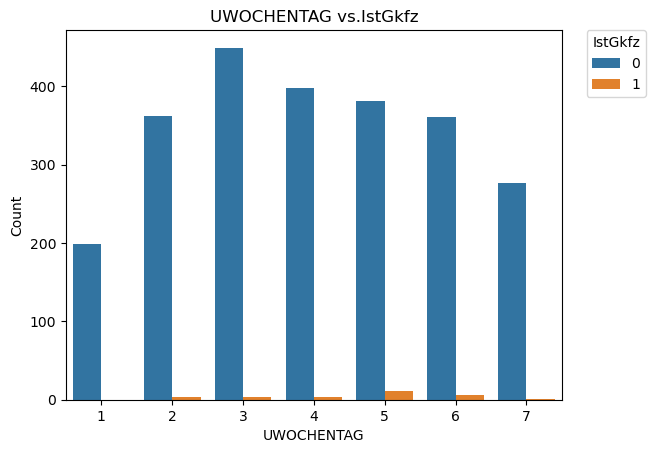

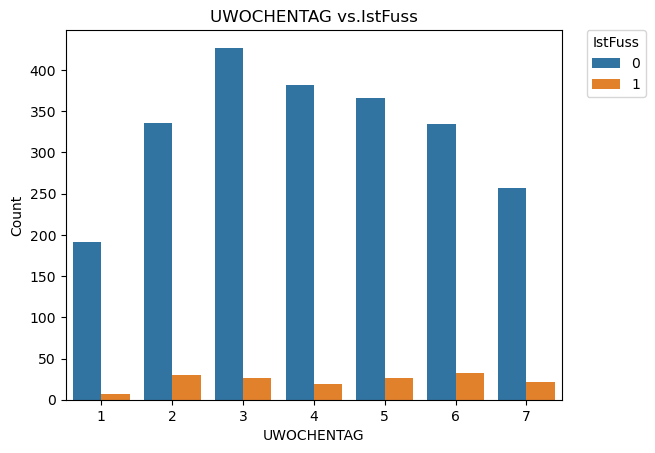

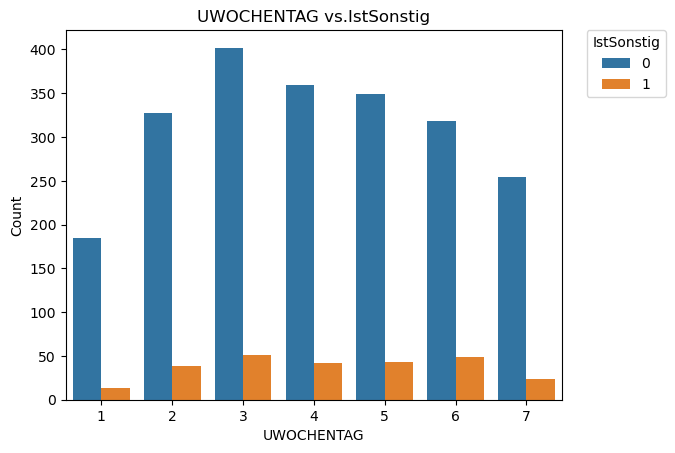

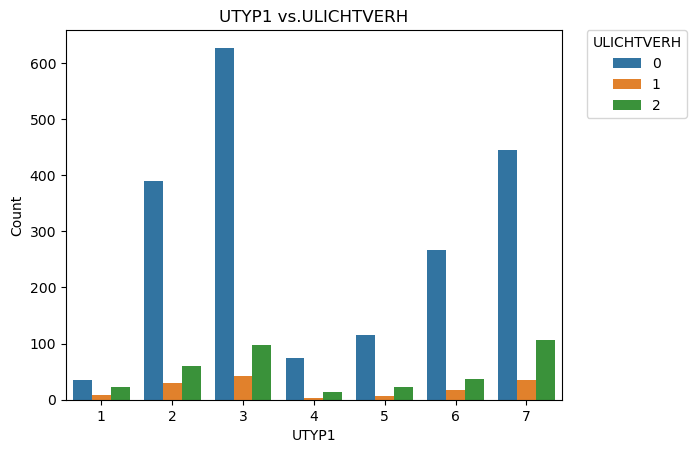

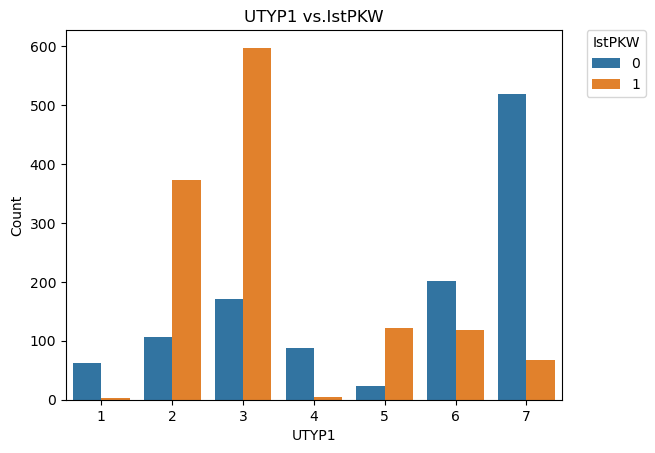

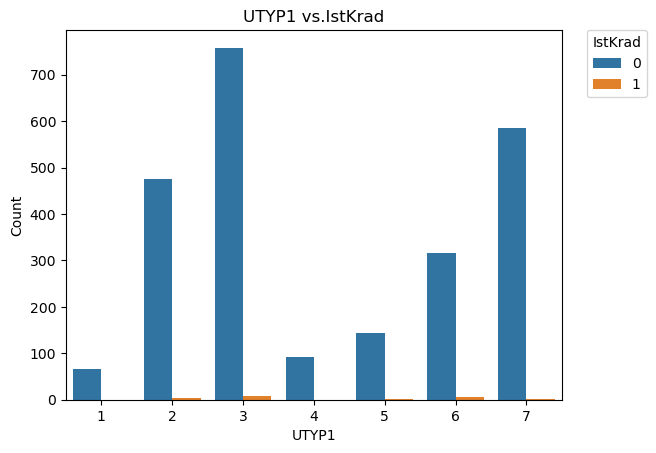

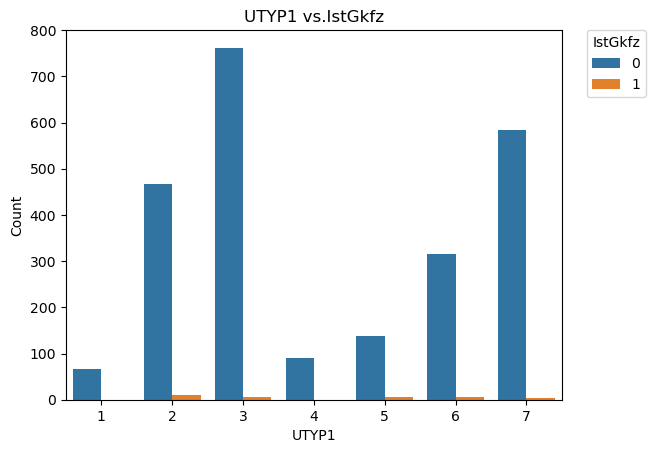

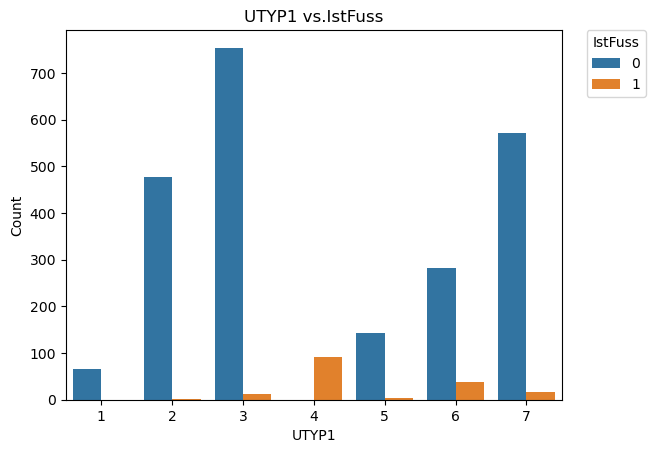

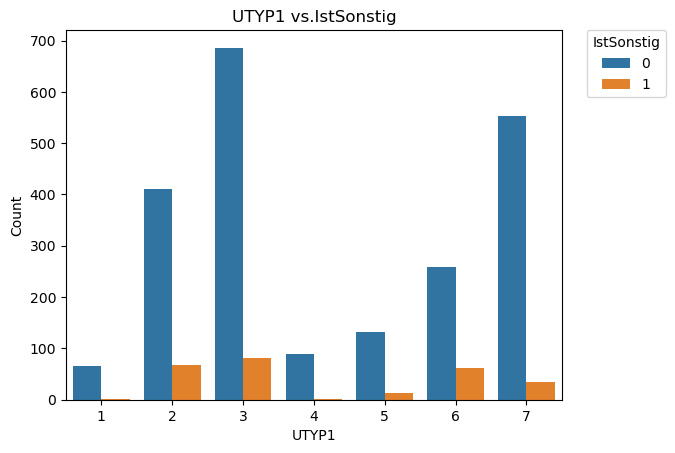

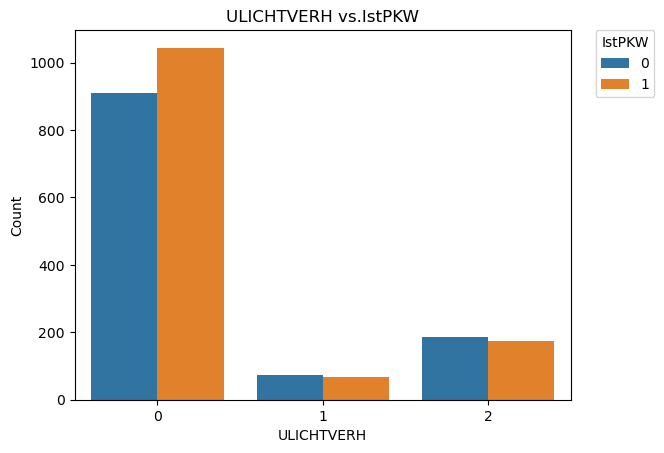

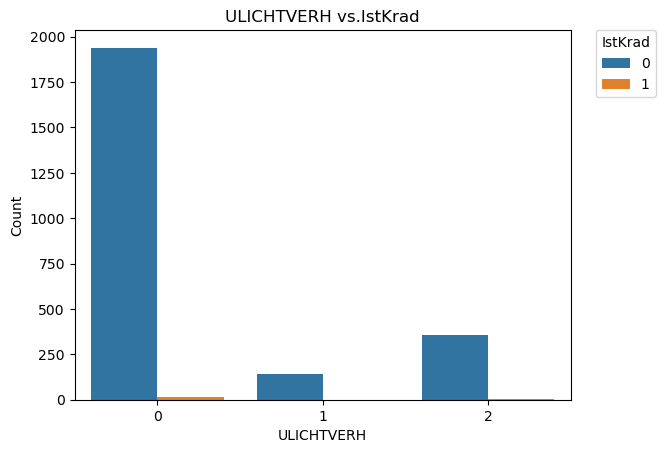

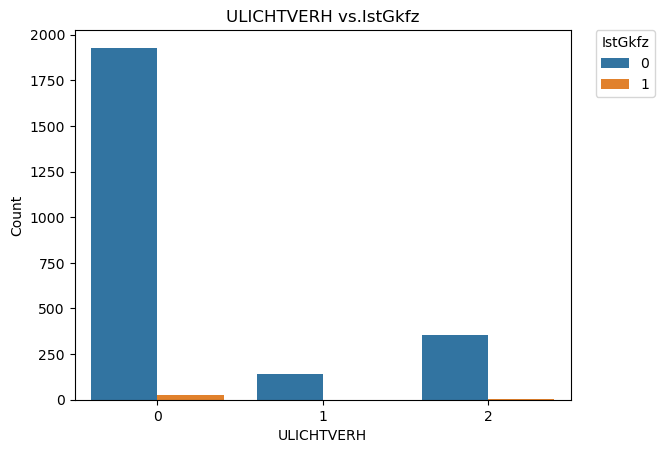

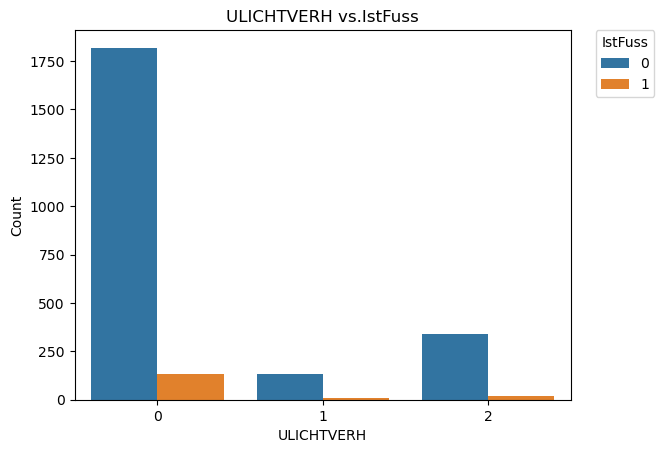

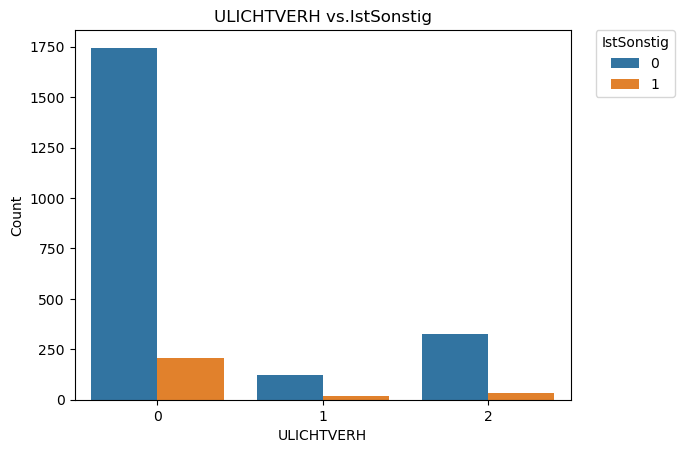

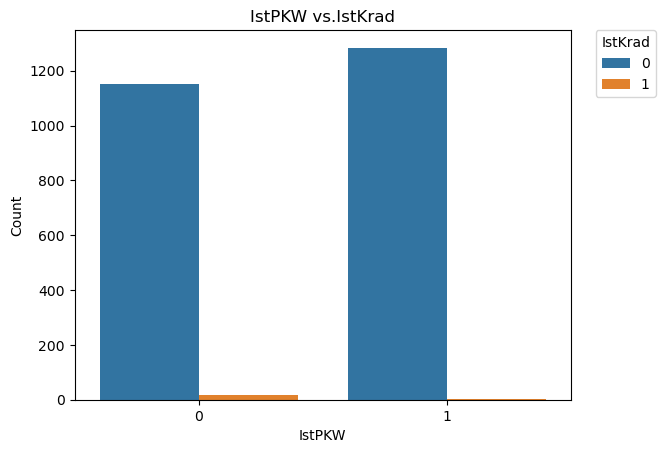

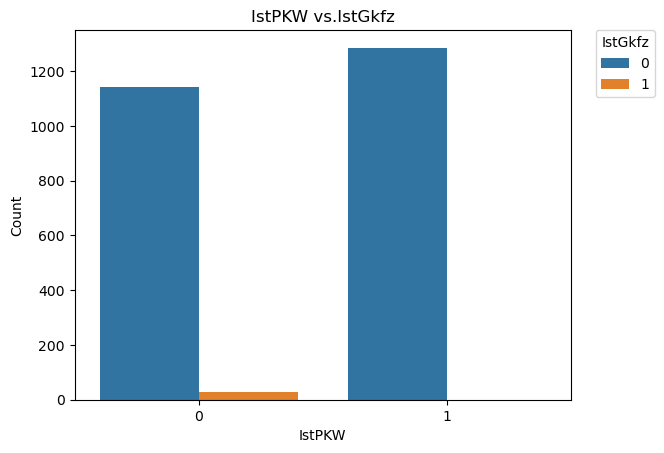

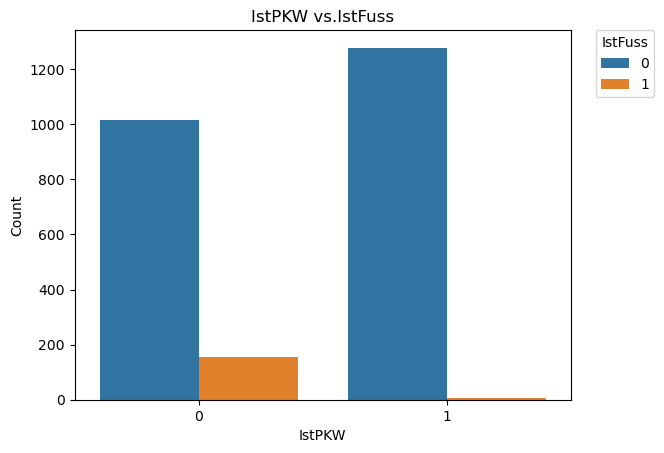

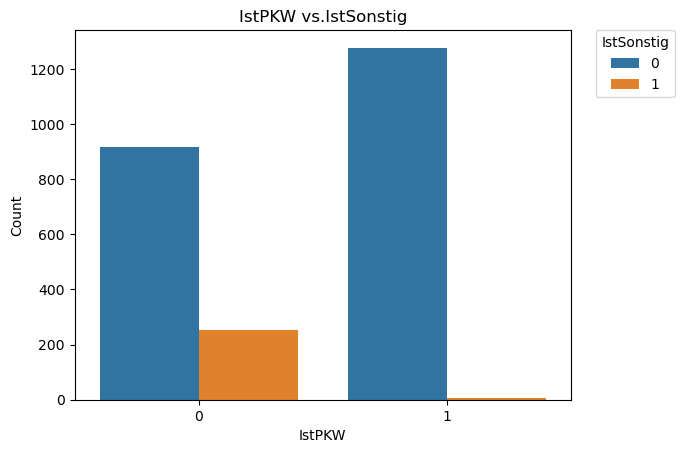

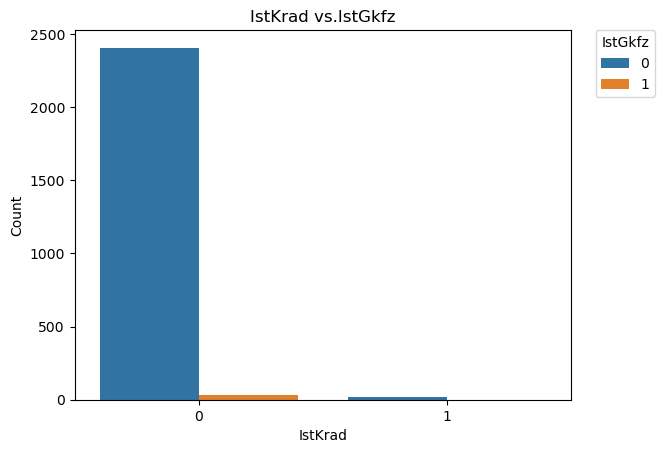

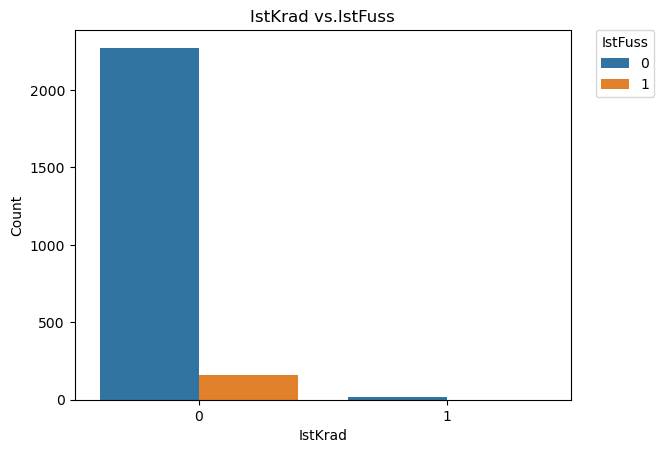

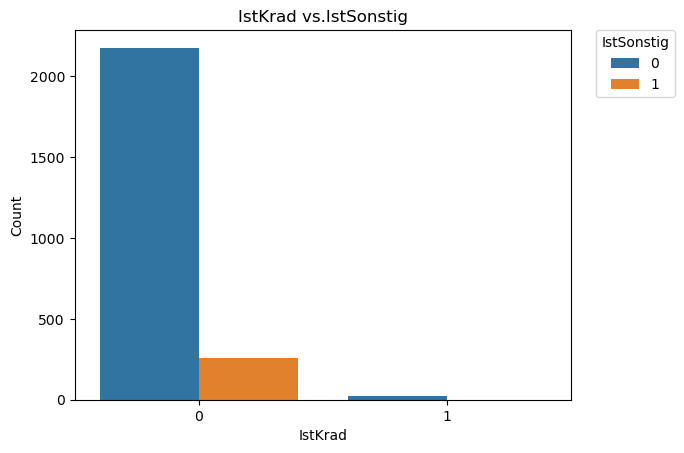

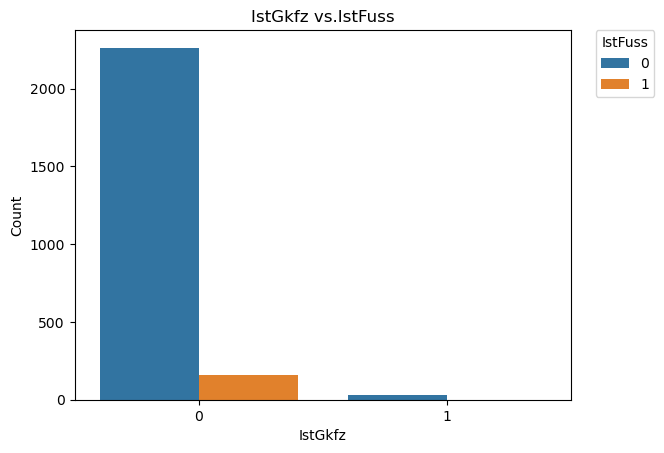

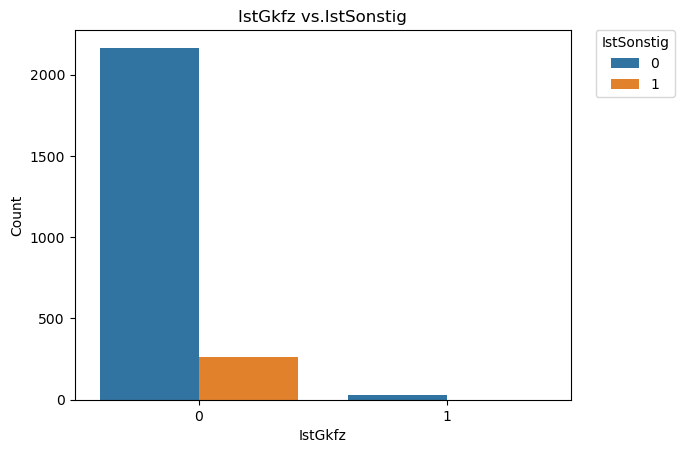

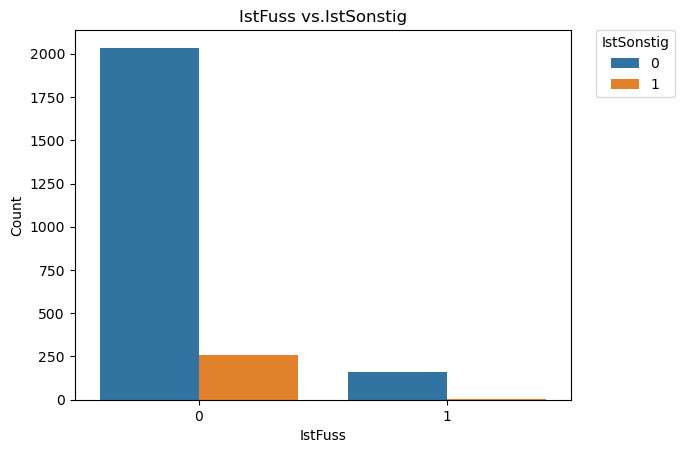

In [120]:
# plot categorical variables vs other categorical variables
# columns to use
cols = ["UKATEGORIE", "UART", "UMONAT", "USTUNDE", "UWOCHENTAG", "UTYP1", "ULICHTVERH", "IstPKW", "IstKrad", "IstGkfz","IstFuss", "IstSonstig"]

for col1 in cols:
    # continue from col1 + 1
    for col2 in cols[cols.index(col1) + 1:]:
        # plot categorical variables vs other categorical variables
        x = df_bike_hh[col1]
        y = df_bike_hh[col2]
        x = x.sort_values()
        y = y.sort_values()
        # Create a bar chart
        # use shorter as hue
        shorter = x if len(x.unique()) < len(y.unique()) else y
        longer = y if len(x.unique()) < len(y.unique()) else x
        sns.countplot(x=longer, hue=shorter, data=df_bike_hh)
        # place legend outside of plot showing title of hue

        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title=shorter.name)
        plt.xlabel(longer.name)
        plt.ylabel('Count')
        plt.title(col1 + ' vs.' + col2)
        plt.show()

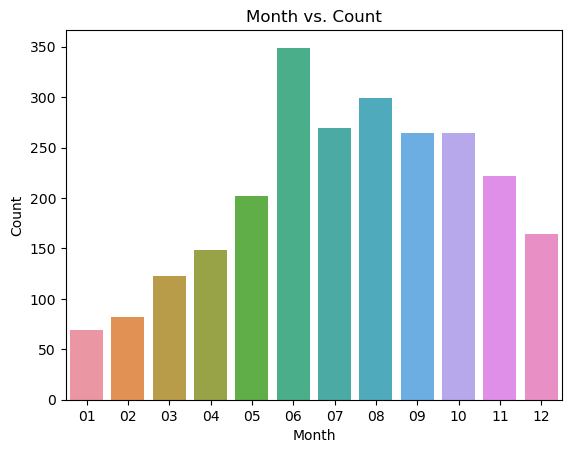

In [34]:
# plot count of values for "UMONAT"
x = df_bike_hh["UMONAT"]
x = x.sort_values()
sns.countplot(x=x)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month vs. Count')
plt.show()

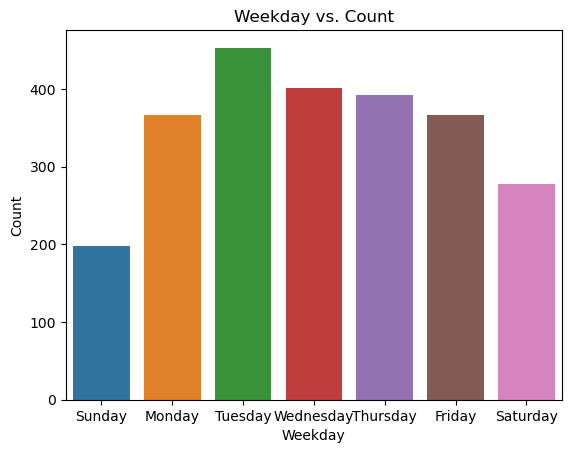

In [35]:
# plot count of values for "UWOCHENTAG"
x = df_bike_hh["UWOCHENTAG"]
x = x.sort_values()
days = {1: "Sunday",
        2: "Monday",
        3: "Tuesday",
        4: "Wednesday",
        5: "Thursday",
        6: "Friday",
        7: "Saturday"}

sns.countplot(x=x)
plt.xticks([0, 1, 2, 3, 4, 5, 6], [days[1], days[2], days[3], days[4], days[5], days[6], days[7]])
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Weekday vs. Count')
plt.show()

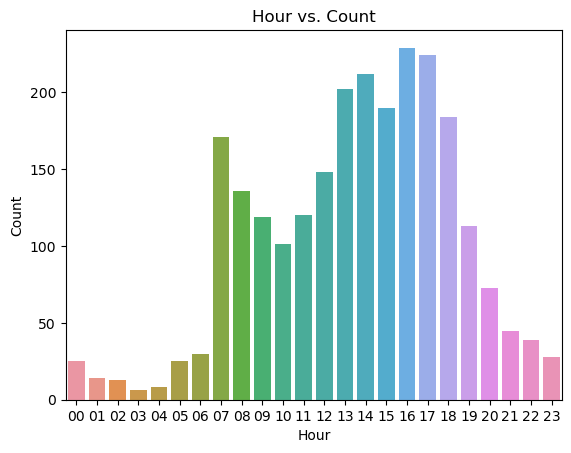

In [36]:
# plot count of values for "USTUNDE"
x = df_bike_hh["USTUNDE"]
x = x.sort_values()
sns.countplot(x=x)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hour vs. Count')
plt.show()

In [37]:
# calculate ratio of "IstPKW" == 1 and "IstPKW" == 0 for each "STUNDE"
df_bike_hh["IstPKW"] = df_bike_hh["IstPKW"].astype(int)

ratio_dict = {}

for hour in df_bike_hh["USTUNDE"].unique():
    df_hour = df_bike_hh[df_bike_hh["USTUNDE"] == hour]
    # calculate ratio
    ratio = df_hour[df_hour["IstPKW"] == 1].size / df_hour[df_hour["IstPKW"] == 0].size
    ratio_dict[hour] = ratio
    # print("Ratio of IstPKW == 1 and IstPKW == 0 for hour {}: {}".format(hour, ratio))

/Users/tobias/opt/miniconda3/envs/geospatial/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


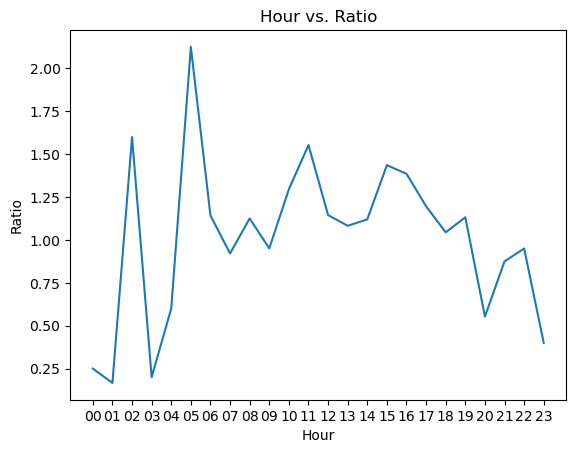

In [38]:
# plot ratio_dict
# sort by key (hour)
ratio_dict = {k: v for k, v in sorted(ratio_dict.items(), key=lambda item: item[0])}
sns.lineplot(x=list(ratio_dict.keys()), y=list(ratio_dict.values()))
plt.xlabel('Hour')
plt.ylabel('Ratio')
plt.title('Hour vs. Ratio')
plt.show()

In [39]:
# split "UMONAT" into seasons
df_bike_hh["UMONAT"] = df_bike_hh["UMONAT"].astype(int)
df_bike_hh["season"] = df_bike_hh["UMONAT"].apply(lambda x: "winter" if x in [1, 2, 12] else "spring" if x in [3, 4, 5] else "summer" if x in [6, 7, 8] else "autumn")

/Users/tobias/opt/miniconda3/envs/geospatial/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/tobias/opt/miniconda3/envs/geospatial/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


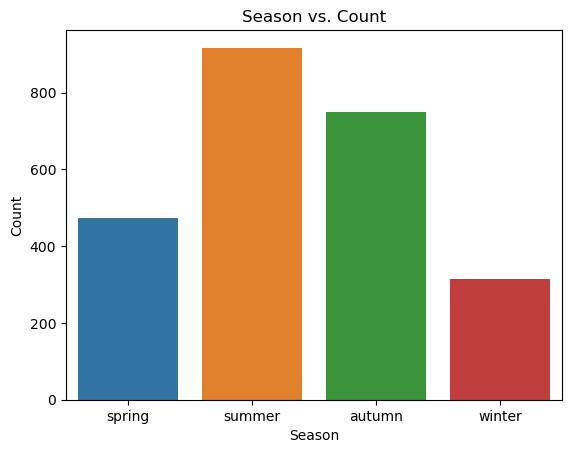

In [40]:
# plot count of values for "season"
x = df_bike_hh["season"]
sorter = ["spring", "summer", "autumn", "winter"]
x = x.sort_values(key=lambda column: column.map(lambda e: sorter.index(e)))
sns.countplot(x=x)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season vs. Count')
plt.show()

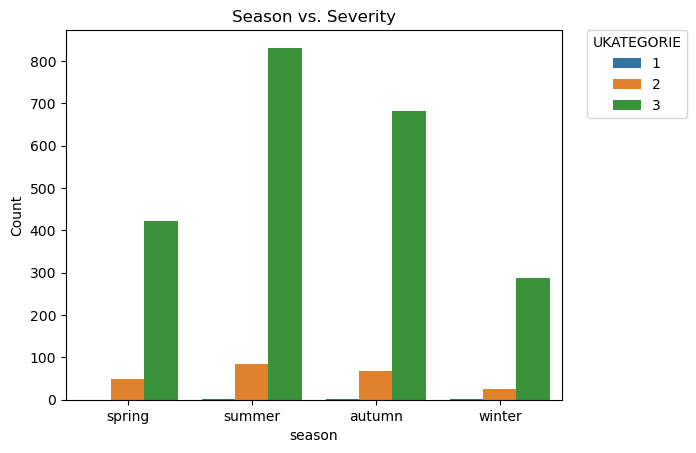

In [41]:
# plot season vs "UKATEGORIE"
x = df_bike_hh["season"]
y = df_bike_hh["UKATEGORIE"]
sorter = ["spring", "summer", "autumn", "winter"]
x = x.sort_values(key=lambda column: column.map(lambda e: sorter.index(e)))
y = y.sort_values()
# Create a bar chart
# use shorter as hue
shorter = x if len(x.unique()) < len(y.unique()) else y
longer = y if len(x.unique()) < len(y.unique()) else x
sns.countplot(x=longer, hue=shorter, data=df_bike_hh)
# place legend outside of plot showing title of hue
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title=shorter.name)
plt.xlabel(longer.name)
plt.ylabel('Count')
plt.title('Season vs. Severity')
plt.show()


In [42]:
# season vs ratio of severity

ratio_dict_severity = {}
for season in df_bike_hh["season"].unique():
    df_season = df_bike_hh[df_bike_hh["season"] == season]
    sum = df_season.size
    fatal_ratio = df_season[df_season["UKATEGORIE"] == "1"].size / sum
    severe_ratio = df_season[df_season["UKATEGORIE"] == "2"].size / sum
    slight_ratio = df_season[df_season["UKATEGORIE"] == "3"].size / sum
    
    ratio = [fatal_ratio, severe_ratio, slight_ratio]
    ratio_dict_severity[season] = ratio


In [43]:
ratio_dict_severity

{'autumn': [0.0013333333333333333, 0.09066666666666667, 0.908],
 'winter': [0.0031746031746031746, 0.08253968253968254, 0.9142857142857143],
 'summer': [0.0021810250817884407, 0.0916030534351145, 0.906215921483097],
 'spring': [0.0, 0.10570824524312897, 0.8942917547568711]}

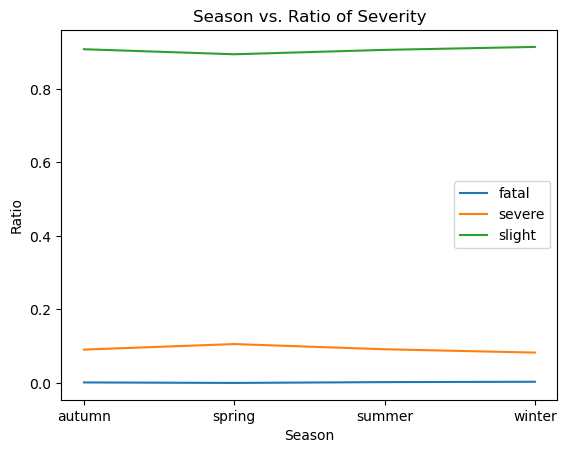

In [44]:
# plot ratio_dict_severity
# sort by key (season)
ratio_dict_severity = {k: v for k, v in sorted(ratio_dict_severity.items(), key=lambda item: item[0])}
sns.lineplot(x=list(ratio_dict_severity.keys()), y=[x[0] for x in list(ratio_dict_severity.values())], label="fatal")
sns.lineplot(x=list(ratio_dict_severity.keys()), y=[x[1] for x in list(ratio_dict_severity.values())], label="severe")
sns.lineplot(x=list(ratio_dict_severity.keys()), y=[x[2] for x in list(ratio_dict_severity.values())], label="slight")
plt.xlabel('Season')
plt.ylabel('Ratio')
plt.title('Season vs. Ratio of Severity')
plt.show()

### Cramers V

In [45]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

In [46]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [47]:
cols = ["UKATEGORIE", "UART", "UMONAT", "USTUNDE", "UWOCHENTAG", "UTYP1", "ULICHTVERH", "IstPKW", "IstKrad", "IstGkfz", "IstSonstig"]

for col1 in cols:
    for col2 in cols[cols.index(col1) + 1:]:
        corr = cramers_v(df_bike_hh[col1], df_bike_hh[col2])
        if corr > 0.1:
            print("Correlation between {} and {}: {}".format(col1, col2, corr))

Correlation between UART and UTYP1: 0.6431658799428369
Correlation between UART and IstPKW: 0.632810826130587
Correlation between UART and IstGkfz: 0.10197526719262816
Correlation between UART and IstSonstig: 0.11075621299927914
Correlation between UMONAT and ULICHTVERH: 0.22238954429473853
Correlation between USTUNDE and UWOCHENTAG: 0.1102688274967186
Correlation between USTUNDE and ULICHTVERH: 0.5337590481319345
Correlation between USTUNDE and IstPKW: 0.11182352749623142
Correlation between UTYP1 and IstPKW: 0.6201064819169803
Correlation between UTYP1 and IstSonstig: 0.15069718349795377
Correlation between IstPKW and IstGkfz: 0.11105462352768923
Correlation between IstPKW and IstSonstig: 0.3376227347491467


### Point Pattern Analysis

In [48]:
# detect islands in df_bike_hh geometry
# Create an empty GeoDataFrame to store the islands
islands = gpd.GeoDataFrame(columns=df_districts.columns)

# Loop over each polygon in the GeoDataFrame
for i, row in df_districts.iterrows():
    # Check if the polygon touches any other polygon
    touches = df_districts[df_districts.geometry.touches(row.geometry)]
    
    # If the polygon doesn't touch any other polygon, it's an island
    if touches.empty:
        # Add the island to the GeoDataFrame
        islands = islands.append(row, ignore_index=True)
        # remove the island from the original GeoDataFrame
        df_districts = df_districts.drop(i)

/var/folders/11/nm6kpssd7xzgy74kn2x39xx80000gn/T/ipykernel_20521/1165241472.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  islands = islands.append(row, ignore_index=True)


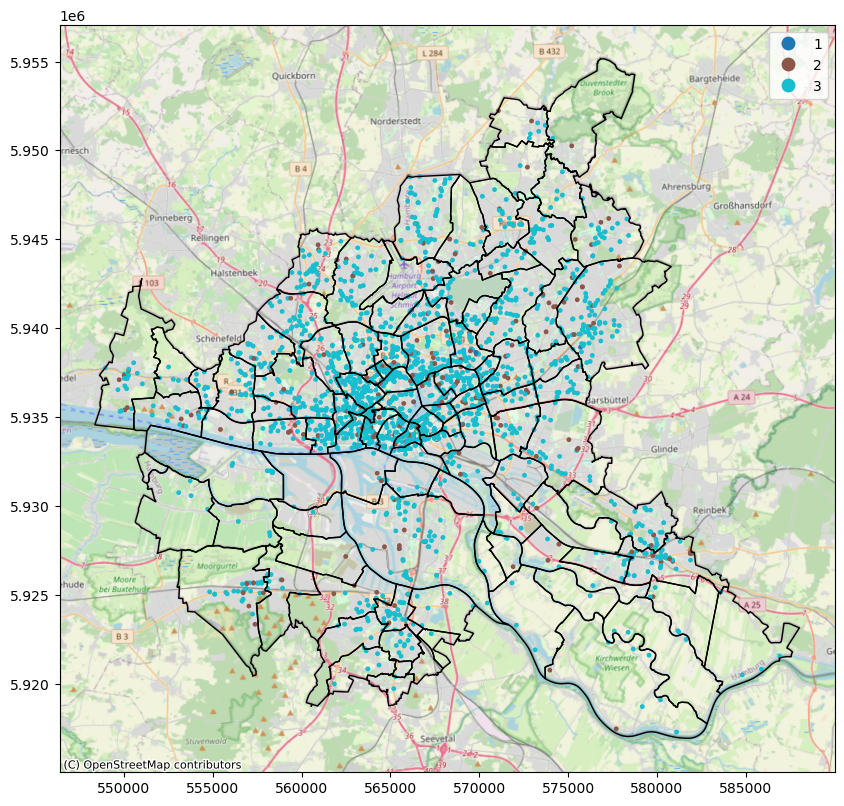

In [49]:
# color legend by 'UKATEGORIE'
fig, ax = plt.subplots(figsize=(10, 10))
df_bike_hh.plot(ax=ax, column="UKATEGORIE", legend=True, markersize=6)
# add districts
df_districts.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
# add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=df_bike_hh.crs.to_string())


In [50]:
# add district to df_bike_hh based on geometry
df_bike_hh["district"] = df_bike_hh["geometry"].apply(lambda x: df_districts[df_districts.geometry.contains(x)]["bezirk_nam"].values[0])


/Users/tobias/opt/miniconda3/envs/geospatial/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [51]:
# add id column for districs in df_bike_hh
df_bike_hh["district_id"] = df_bike_hh["district"].apply(lambda x: df_districts[df_districts["bezirk_nam"] == x]["bezirk"].values[0])

/Users/tobias/opt/miniconda3/envs/geospatial/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [52]:
import pandas as pd
import esda
from pysal.lib import weights
from splot.esda import (
    moran_scatterplot, lisa_cluster, plot_local_autocorrelation, plot_moran
)
from splot.libpysal import plot_spatial_weights

In [53]:
cat_cols = ["UKATEGORIE", "UART", "UMONAT", "USTUNDE", "UWOCHENTAG", "UTYP1", "ULICHTVERH", "IstPKW", "IstKrad", "IstGkfz", "IstSonstig"]

In [54]:
for col in cat_cols:
    dummies = pd.get_dummies(df_bike_hh[col], prefix=col, prefix_sep='_')
    df_bike_hh = pd.concat([df_bike_hh, dummies], axis=1)
    df_bike_hh = df_bike_hh.drop(col, axis=1)

In [55]:
df_grouped = df_bike_hh.groupby(["district_id"]).sum()

/var/folders/11/nm6kpssd7xzgy74kn2x39xx80000gn/T/ipykernel_20521/263507482.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_bike_hh.groupby(["district_id"]).sum()


In [56]:
df_districts

OBJECTID bezirk     bezirk_nam          stadtteil_ stadttei_1 stadttei_2  \
0           1      1  Hamburg-Mitte    Hamburg-Altstadt      02101        101   
1           2      1  Hamburg-Mitte           HafenCity      02102        102   
2           3      1  Hamburg-Mitte            Neustadt      02103        103   
3           4      1  Hamburg-Mitte           St. Pauli      02104        104   
4           5      1  Hamburg-Mitte           St. Georg      02105        105   
..        ...    ...            ...                 ...        ...        ...   
99        100      7        Harburg           Hausbruch      02713        713   
100       101      7        Harburg  Neugraben-Fischbek      02714        714   
101       102      7        Harburg             Francop      02715        715   
102       103      7        Harburg          Neuenfelde      02716        716   
103       104      7        Harburg               Cranz      02717        717   

       SHAPE_Leng    SHAPE_Area  \
0     9028.180532  3.676562e+06   
1    13902.691334  6.860720e+06   
2    11133.923114  6.395226e+06   
3    15968.675123  6.343533e+06   
4     9795.650670  5.155061e+06   
..            ...           ...   
99   34659.184329  2.770431e+07   
100  42482.635108  6.344999e+07   
101  23501.637669  2.486794e+07   
102  31946.432527  4.424464e+07   
103   9995.339044  3.768256e+06   

                                              geometry  
0    POLYGON ((566655.103 5933760.301, 566722.625 5...  
1    POLYGON ((566183.919 5932468.981, 566099.304 5...  
2    POLYGON ((565841.224 5934181.092, 565729.797 5...  
3    POLYGON ((563834.747 5933258.107, 563765.973 5...  
4    POLYGON ((567068.406 5933916.007, 567055.305 5...  
..                                                 ...  
99   POLYGON ((559335.214 5925124.684, 559331.386 5...  
100  POLYGON ((556513.916 5921502.868, 556488.926 5...  
101  POLYGON ((558377.088 5930115.476, 558381.359 5...  
102  POLYGON ((551927.877 5928219.428, 551922.431 5...  
103  POLYGON ((552445.343 5932065.963, 552431.310 5...  

[103 rows x 9 columns]

In [57]:
# group df_districts by bezirk
# group the GeoDataFrame by the 'district_id' column and dissolve the geometries into a single geometry using the 'unary_union' method
district_geomtries = df_districts.groupby('bezirk')['geometry'].apply(lambda x: x.unary_union)

# convert the resulting series to a GeoDataFrame
dissolved_gdf = gpd.GeoDataFrame(geometry=district_geomtries)


In [58]:
dissolved_gdf

geometry
bezirk                                                   
1       POLYGON ((566380.311 5925325.069, 566282.956 5...
2       POLYGON ((555651.304 5933510.967, 555337.017 5...
3       POLYGON ((565797.903 5934832.877, 565797.458 5...
4       POLYGON ((564391.545 5937420.714, 564382.192 5...
5       MULTIPOLYGON (((573346.824 5935754.906, 573342...
6       POLYGON ((573715.446 5920276.955, 573693.672 5...
7       POLYGON ((561453.250 5919328.943, 561178.819 5...

In [59]:
# add geomtry from df_districts
df_grouped = df_grouped.merge(dissolved_gdf, left_on="district_id", right_on="bezirk")

In [60]:
df_grouped["district_id"] = df_grouped.index + 1


In [61]:
w = weights.Queen.from_dataframe(df_grouped, idVariable="district_id")

In [62]:
# Row standardize the matrix
w.transform = 'R'

AttributeError: 'DataFrame' object has no attribute 'centroid'

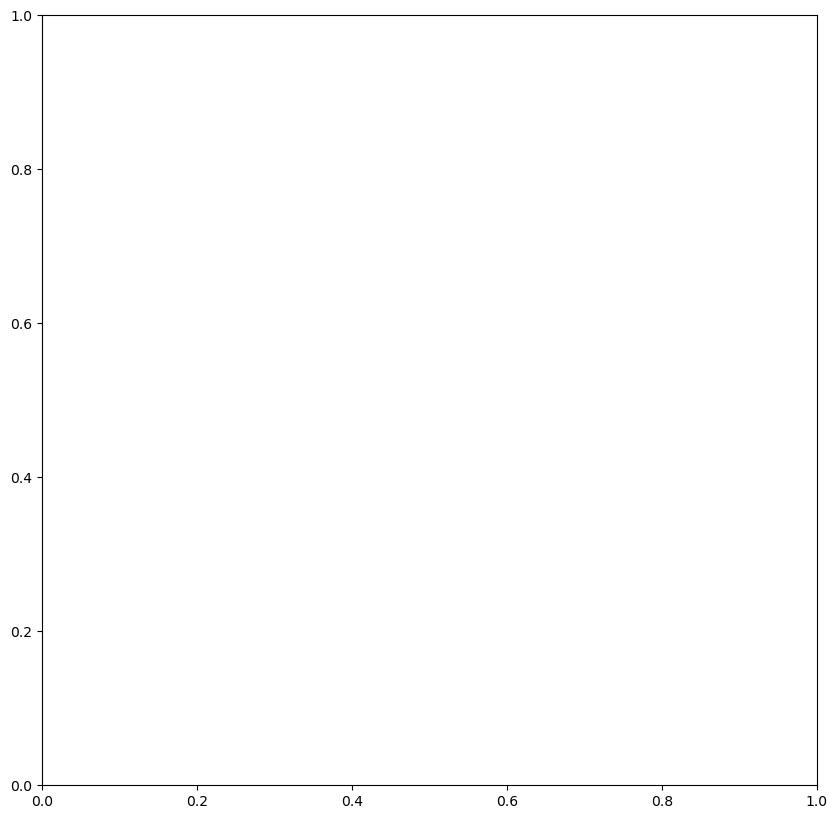

In [63]:
plot_spatial_weights(w, df_grouped, indexed_on="district_id");

In [64]:
df_grouped.columns

Index(['OBJECTID', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'UKATEGORIE_1', 'UKATEGORIE_2', 'UKATEGORIE_3', 'UART_0', 'UART_1',
       'UART_2', 'UART_3', 'UART_4', 'UART_5', 'UART_6', 'UART_7', 'UART_8',
       'UART_9', 'UMONAT_1', 'UMONAT_2', 'UMONAT_3', 'UMONAT_4', 'UMONAT_5',
       'UMONAT_6', 'UMONAT_7', 'UMONAT_8', 'UMONAT_9', 'UMONAT_10',
       'UMONAT_11', 'UMONAT_12', 'USTUNDE_00', 'USTUNDE_01', 'USTUNDE_02',
       'USTUNDE_03', 'USTUNDE_04', 'USTUNDE_05', 'USTUNDE_06', 'USTUNDE_07',
       'USTUNDE_08', 'USTUNDE_09', 'USTUNDE_10', 'USTUNDE_11', 'USTUNDE_12',
       'USTUNDE_13', 'USTUNDE_14', 'USTUNDE_15', 'USTUNDE_16', 'USTUNDE_17',
       'USTUNDE_18', 'USTUNDE_19', 'USTUNDE_20', 'USTUNDE_21', 'USTUNDE_22',
       'USTUNDE_23', 'UWOCHENTAG_1', 'UWOCHENTAG_2', 'UWOCHENTAG_3',
       'UWOCHENTAG_4', 'UWOCHENTAG_5', 'UWOCHENTAG_6', 'UWOCHENTAG_7',
       'UTYP1_1', 'UTYP1_2', 'UTYP1_3', 'UTYP1_4', 'UTYP1_5', 'UTYP1_6',
       'UTYP1_7', 'ULICHTVERH_0', 'ULICH

In [65]:
df_grouped['w_IstPKW_1'] = weights.lag_spatial(w, df_grouped['IstPKW_1']) # we pass the weights object and the column with values to base the spatial lag on

In [66]:
df_grouped[['district_id', 'IstPKW_1', 'w_IstPKW_1']].head()

district_id  IstPKW_1  w_IstPKW_1
0            1       207  179.666667
1            2       198  214.000000
2            3       221  228.000000
3            4       279  218.333333
4            5       227  243.000000

In [67]:
df_grouped['IstPKW_1_std'] = (df_grouped['IstPKW_1'] - df_grouped['IstPKW_1'].mean()) / df_grouped['IstPKW_1'].std()

In [68]:
df_grouped['w_IstPKW_1_std'] = weights.lag_spatial(w, df_grouped['IstPKW_1_std'])

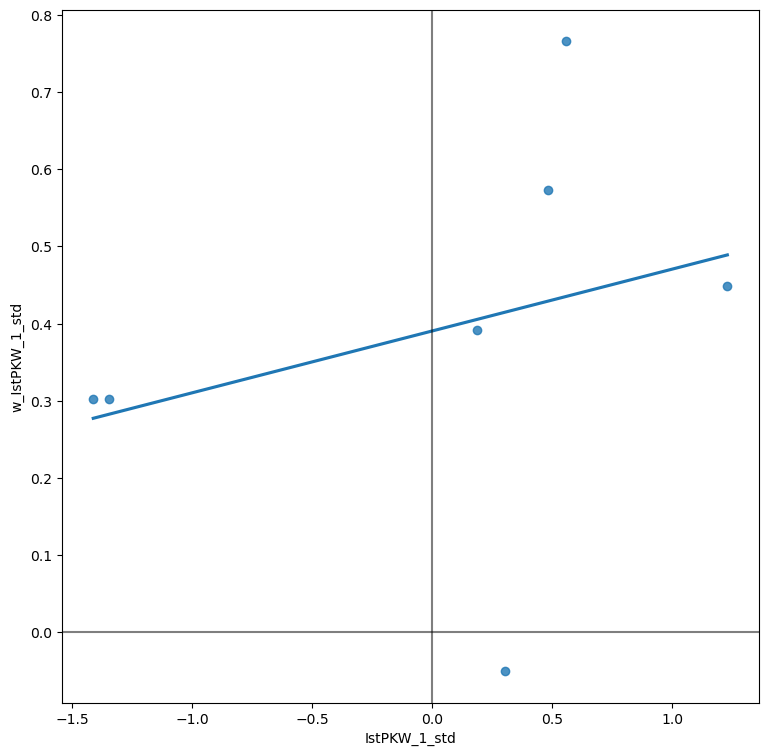

In [69]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='IstPKW_1_std', y='w_IstPKW_1_std', data=df_grouped, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()

In [70]:
mi = esda.Moran(df_grouped['IstPKW_1'], w)

In [71]:
mi.I

0.08011732016054332

In [72]:
mi.p_sim

0.178

### Spatial Autocorrealtion